In [337]:
from main_functions import create_data, generate_synthetic_variables, plot_frequencies, plot_correlation_matrix, create_dummy_variables, find_correlations, filter_data_by_value, cramers_v, chi_squared_test, combine_dataframes, plot_correlation_heatmap, calculate_vif, plot_distributions, binary_logistic_regression, smote_oversampling, sk_binary_logistic_regression

In [338]:
data = create_data()

In [339]:
data.head()

status  duration credit_history  ... telephone  foreign_worker credit_risk
0      1        18              4  ...         1               2           1
1      1         9              4  ...         1               2           1
2      2        12              2  ...         1               2           1
3      1        12              4  ...         1               1           1
4      1        12              4  ...         1               1           1

[5 rows x 21 columns]

In [340]:
data.job[1]

'3'

In [341]:
rules = [
    # {
    #     'name': 'synthetic_var_1',
    #     'conditions': [
    #         {'col': 'col1', 'values': ['A', 'B']},  # Only OR needed
    #         {'col': 'col2', 'values': ['X']}  # Only OR needed
    #     ],
    #     'operator': 'AND'  # This is still valid for combining conditions
    # },
    # {
    #     'name': 'synthetic_var_2',
    #     'conditions': [
    #         {'col': 'col2', 'values': ['Y']},  # Only OR needed
    #         {'col': 'col3', 'values': ['Yes']}  # Only OR needed
    #     ],
    #     'operator': 'OR'  # This is still valid for combining conditions
    # },

    # {
    #     'name': 'job__credit_history__class1',
    #     'conditions': [
    #         {'col': 'job', 'values': ['3', '4']},
    #         {'col': 'credit_history', 'values': ['2', '3', '4']}
    #     ],
    #     'operator': 'AND'
    # },
    {
        'name': 'job__credit_history__class2', ##Low quality jobs and good credit history
        'conditions': [
            {'col': 'job', 'values': ['1', '2']},
            {'col': 'credit_history', 'values': ['2', '3', '4']}
        ],
        'operator': 'AND'
    },
    {
        'name': 'status__class1', #Has or not a checking accountx
        'conditions': [
            {'col': 'status', 'values': ['2', '3', '4']}
        ],
        'operator': 'AND'
    },
    # {
    #     'name': 'status__job__class1',
    #     'conditions': [
    #         {'col': 'job', 'values': ['1', '2']},
    #         {'col': 'status', 'values': ['2', '3', '4']}
    #     ],
    #     'operator': 'AND'
    # },
    {
        'name': 'status__job__class2', ## High quality jobs and has checking account
        'conditions': [
            {'col': 'job', 'values': ['3', '4']},
            {'col': 'status', 'values': ['2', '3', '4']}
        ],
        'operator': 'AND'
    },
    {
        'name': 'installment_rate__job__class1', ##High quality jobs and low installment rate
        'conditions': [
            {'col': 'installment_rate', 'values': ['1', '2']},
            {'col': 'job', 'values': ['3', '4']},

        ],
        'operator': 'AND'
    },
    {
        'name': 'savings__installment_rate__class1', ##High savings and low installment rate
        'conditions': [
            {'col': 'savings', 'values': ['3', '4', '5']},
            {'col': 'installment_rate', 'values': ['1', '2']},
        ],
        'operator': 'AND'
    },
    {
        'name': 'savings__installment_rate__job__class1', ##High savings and low installment rate and high quality jobs
        'conditions': [
            {'col': 'savings', 'values': ['3', '4', '5']},
            {'col': 'installment_rate', 'values': ['1', '2']},
            {'col': 'job', 'values': ['3', '4']},
        ],
        'operator': 'AND'
    },
    {
        'name': 'employment_duration__installment_rate__class1', ##Low employment duration and low installment rate
        'conditions': [
            {'col': 'employment_duration', 'values': ['1', '2']},
            {'col': 'installment_rate', 'values': ['1', '2']},

        ],
        'operator': 'AND'
    },
]

synthetic_df = generate_synthetic_variables(data, rules)

In [342]:
synthetic_df.describe()

job__credit_history__class2  ...  employment_duration__installment_rate__class1
count                  1000.000000  ...                                    1000.000000
mean                      0.199000  ...                                       0.094000
std                       0.399448  ...                                       0.291975
min                       0.000000  ...                                       0.000000
25%                       0.000000  ...                                       0.000000
50%                       0.000000  ...                                       0.000000
75%                       0.000000  ...                                       0.000000
max                       1.000000  ...                                       1.000000

[8 rows x 7 columns]

In [343]:
synthetic_df.job__credit_history__class2.value_counts()

0    801
1    199
Name: job__credit_history__class2, dtype: int64

In [344]:
synthetic_df.status__class1.value_counts()

1    726
0    274
Name: status__class1, dtype: int64

In [345]:
synthetic_df.status__job__class2.value_counts()

1    569
0    431
Name: status__job__class2, dtype: int64

In [346]:
synthetic_df.installment_rate__job__class1.value_counts()

0    729
1    271
Name: installment_rate__job__class1, dtype: int64

In [347]:
synthetic_df.savings__installment_rate__class1.value_counts()

0    895
1    105
Name: savings__installment_rate__class1, dtype: int64

In [348]:
synthetic_df.savings__installment_rate__job__class1.value_counts()

0    926
1     74
Name: savings__installment_rate__job__class1, dtype: int64

In [349]:
synthetic_df.employment_duration__installment_rate__class1.value_counts()

0    906
1     94
Name: employment_duration__installment_rate__class1, dtype: int64

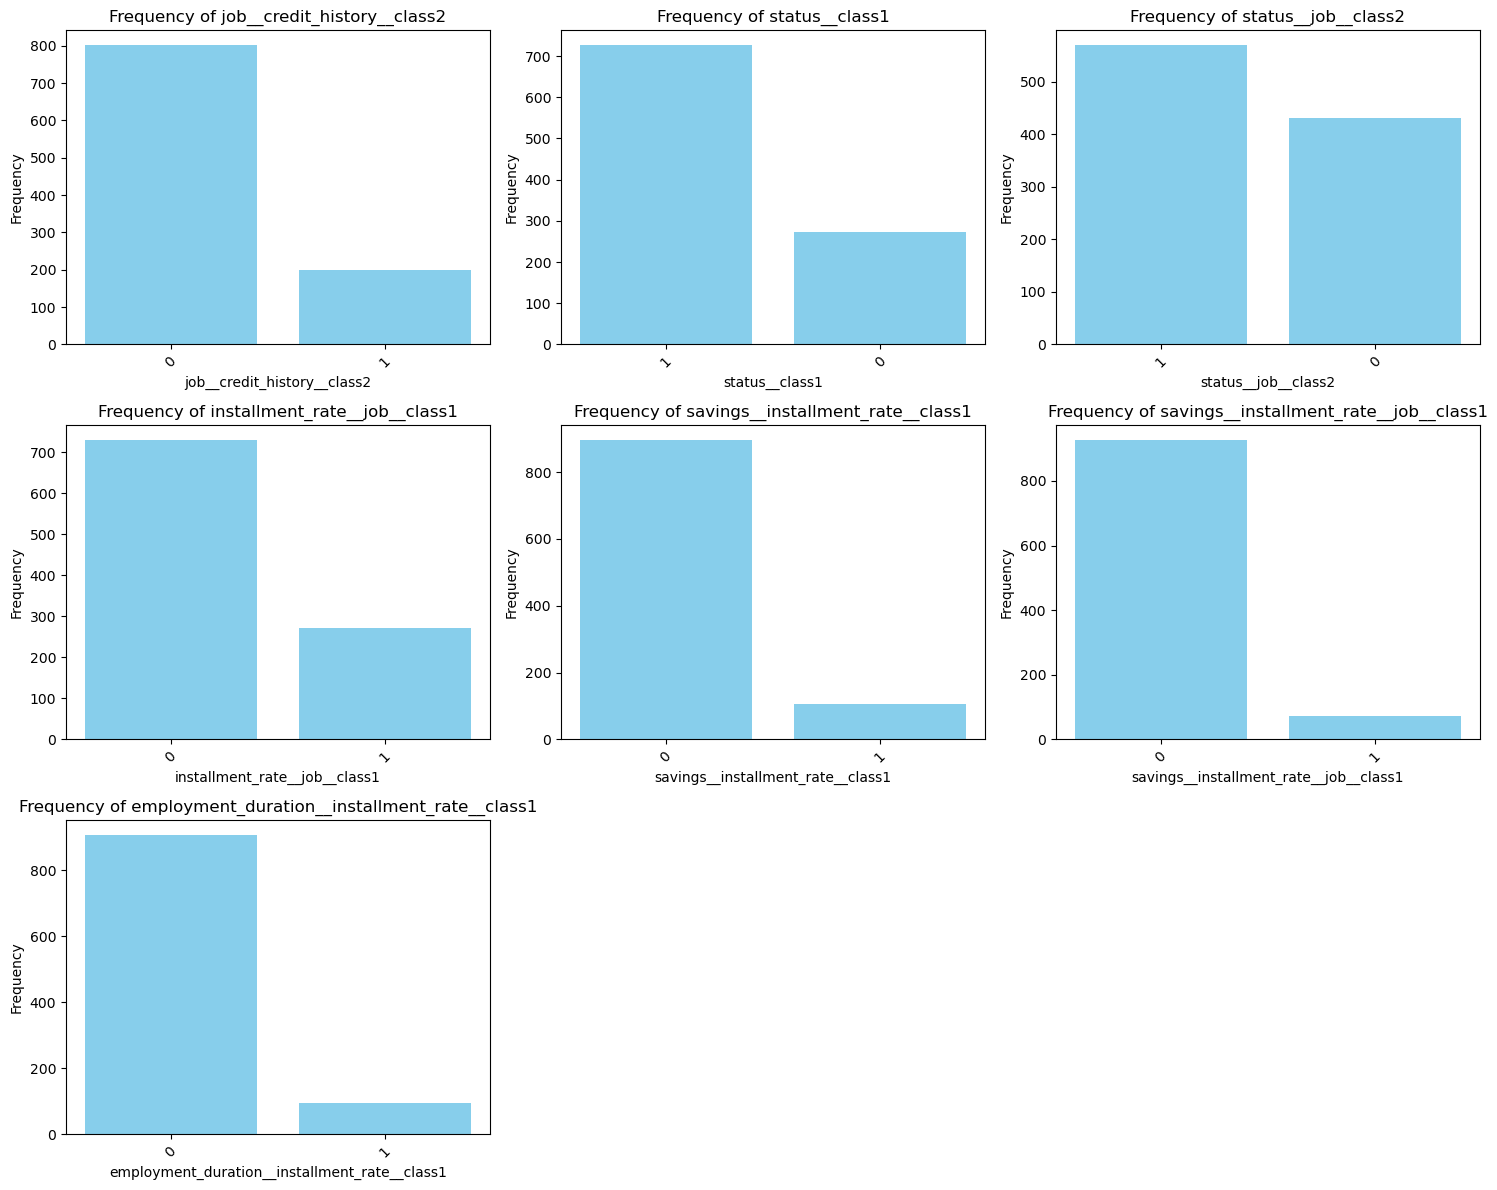

In [350]:
plot_frequencies(synthetic_df, synthetic_df.columns)

In [351]:
data.corr()


/var/folders/l6/bfk83gm94_x23ld0qfdlhyhh0000gs/T/ipykernel_94260/1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


duration    amount       age
duration  1.000000  0.624988 -0.037550
amount    0.624988  1.000000  0.032273
age      -0.037550  0.032273  1.000000

In [352]:
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from main_functions import merge_two_subsets

report = data.profile_report(sort=None, html={'style':{'full_width':True}})
# synthetic_df.profile_report(sort=None, html={'style':{'full_width':True}})
# fullset = merge_two_subsets(data, synthetic_df, 1, False)
# fullset.profile_report(sort=None, html={'style':{'full_width':True}})


In [353]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/victor.lezama/Desktop/DataSciencePortfolio/south-german-credit/main_functions.py:209: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = currDf.corr()


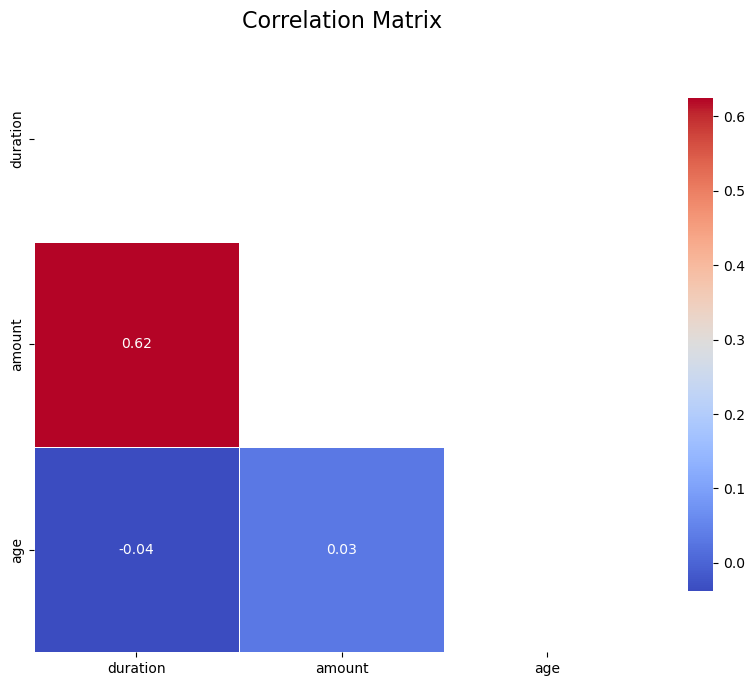

In [354]:
corr_results = plot_correlation_matrix(data, True, 0.5)

In [355]:
data.corr()

/var/folders/l6/bfk83gm94_x23ld0qfdlhyhh0000gs/T/ipykernel_94260/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


duration    amount       age
duration  1.000000  0.624988 -0.037550
amount    0.624988  1.000000  0.032273
age      -0.037550  0.032273  1.000000

In [356]:
data.head()

status  duration credit_history  ... telephone  foreign_worker credit_risk
0      1        18              4  ...         1               2           1
1      1         9              4  ...         1               2           1
2      2        12              2  ...         1               2           1
3      1        12              4  ...         1               1           1
4      1        12              4  ...         1               1           1

[5 rows x 21 columns]

In [357]:
dummy_job_data = create_dummy_variables(data, 'job', 'credit_risk')
chi_squared_test(dummy_job_data, 'credit_risk_1')

{'job_1': {'chi2_statistic': 0.0, 'p_value': 1.0},
 'job_2': {'chi2_statistic': 0.36458333333333326,
  'p_value': 0.5459717226765591},
 'job_3': {'chi2_statistic': 0.12767869910727053,
  'p_value': 0.7208510894485458},
 'job_4': {'chi2_statistic': 1.4052029897100318,
  'p_value': 0.23585435941881344}}

No se encontraron resultados significativos

filter_data_by_value(data, 'job', 'credit_risk', )

In [358]:
dummy_purpose_data = create_dummy_variables(data, 'purpose', 'credit_risk')
chi_squared_test(dummy_purpose_data, 'credit_risk_1')

{'purpose_0': {'chi2_statistic': 8.89689075067665,
  'p_value': 0.002856566553748428},
 'purpose_1': {'chi2_statistic': 9.25466353917177,
  'p_value': 0.002348964871210314},
 'purpose_10': {'chi2_statistic': 0.3253325621746673,
  'p_value': 0.5684204565098252},
 'purpose_2': {'chi2_statistic': 0.32894113399243696,
  'p_value': 0.5662832529305258},
 'purpose_3': {'chi2_statistic': 10.918603552532124,
  'p_value': 0.0009520334593322895},
 'purpose_4': {'chi2_statistic': 0.0, 'p_value': 1.0},
 'purpose_5': {'chi2_statistic': 0.17926858417655958,
  'p_value': 0.67200256260362},
 'purpose_6': {'chi2_statistic': 4.235588972431078,
  'p_value': 0.039584886942432625},
 'purpose_8': {'chi2_statistic': 0.7688241795204462,
  'p_value': 0.38058104774935475},
 'purpose_9': {'chi2_statistic': 1.0525108309127207,
  'p_value': 0.30492952785971544}}

Columnas con relación significativa:

purpose_0

purpose_1

purpose_3

purpose_6

In [359]:
purpose_0_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '0')
purpose_1_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '1')
purpose_3_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '3')
purpose_6_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '6')

In [360]:
dummy_credit_history_data = create_dummy_variables(data, 'credit_history', 'credit_risk')
chi_squared_test(dummy_credit_history_data, 'credit_risk_1')

{'credit_history_0': {'chi2_statistic': 19.37624007936508,
  'p_value': 1.073341892470815e-05},
 'credit_history_1': {'chi2_statistic': 16.742644181001225,
  'p_value': 4.280790428706077e-05},
 'credit_history_2': {'chi2_statistic': 1.7252585498269963,
  'p_value': 0.18901755896476705},
 'credit_history_3': {'chi2_statistic': 0.07179406850459524,
  'p_value': 0.7887423075813524},
 'credit_history_4': {'chi2_statistic': 32.154138308586035,
  'p_value': 1.42413027988845e-08}}

In [361]:
credit_history_0_dataset = filter_data_by_value(data, 'credit_history', 'credit_risk', '0')
credit_history_1_dataset = filter_data_by_value(data, 'credit_history', 'credit_risk', '1')
credit_history_4_dataset = filter_data_by_value(data, 'credit_history', 'credit_risk', '4')

In [362]:
dummy_status_data = create_dummy_variables(data, 'status', 'credit_risk')
chi_squared_test(dummy_status_data, 'credit_risk_1')

{'status_1': {'chi2_statistic': 65.47822523270433,
  'p_value': 5.875962249780948e-16},
 'status_2': {'chi2_statistic': 13.717183942825857,
  'p_value': 0.00021250124875290776},
 'status_3': {'chi2_statistic': 1.5617298739725922,
  'p_value': 0.21141211312671457},
 'status_4': {'chi2_statistic': 102.52981425771291,
  'p_value': 4.2492427145380535e-24}}

In [363]:
status_1_dataset = filter_data_by_value(data, 'status', 'credit_risk', '1')
status_3_dataset = filter_data_by_value(data, 'status', 'credit_risk', '3')
status_4_dataset = filter_data_by_value(data, 'status', 'credit_risk', '4')

In [364]:
dummy_savings_data = create_dummy_variables(data, 'savings', 'credit_risk')
chi_squared_test(dummy_savings_data, 'credit_risk_1')

{'savings_1': {'chi2_statistic': 25.210002126427565,
  'p_value': 5.141485805926421e-07},
 'savings_2': {'chi2_statistic': 0.34841571354868156,
  'p_value': 0.5550113291454761},
 'savings_3': {'chi2_statistic': 4.417372308819172,
  'p_value': 0.035574779851583395},
 'savings_4': {'chi2_statistic': 6.5036431239162305,
  'p_value': 0.010765368497813614},
 'savings_5': {'chi2_statistic': 15.980986906203112,
  'p_value': 6.398183893417964e-05}}

In [365]:
savings_1_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '1')
savings_3_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '3')
savings_4_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '4')
savings_5_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '5')

In [366]:
dummy_personal_status_sex_data = create_dummy_variables(data, 'personal_status_sex', 'credit_risk')
chi_squared_test(dummy_personal_status_sex_data, 'credit_risk_1')

{'personal_status_sex_1': {'chi2_statistic': 2.030075187969925,
  'p_value': 0.1542129779461507},
 'personal_status_sex_2': {'chi2_statistic': 5.348516218081436,
  'p_value': 0.020739913068713305},
 'personal_status_sex_3': {'chi2_statistic': 6.159816487799175,
  'p_value': 0.013068476586913557},
 'personal_status_sex_4': {'chi2_statistic': 0.25138862286918245,
  'p_value': 0.6160989982564875}}

In [367]:
personal_status_sex_2_dataset = filter_data_by_value(data, 'personal_status_sex', 'credit_risk', '2')
personal_status_sex_3_dataset = filter_data_by_value(data, 'personal_status_sex', 'credit_risk', '3')

In [368]:
dummy_other_debtors_data = create_dummy_variables(data, 'other_debtors', 'credit_risk')
chi_squared_test(dummy_other_debtors_data, 'credit_risk_1')

{'other_debtors_1': {'chi2_statistic': 0.0, 'p_value': 1.0},
 'other_debtors_2': {'chi2_statistic': 3.2748011079097825,
  'p_value': 0.0703514534965371},
 'other_debtors_3': {'chi2_statistic': 2.5125191264431783,
  'p_value': 0.11294525539005033}}

Nada significativo

In [369]:
dummy_other_installment_plans_data = create_dummy_variables(data, 'other_installment_plans', 'credit_risk')
chi_squared_test(dummy_other_installment_plans_data, 'credit_risk_1')

{'other_installment_plans_1': {'chi2_statistic': 8.715377125875204,
  'p_value': 0.0031553713868776602},
 'other_installment_plans_2': {'chi2_statistic': 2.0582366142858195,
  'p_value': 0.15138526991472956},
 'other_installment_plans_3': {'chi2_statistic': 12.206068657681563,
  'p_value': 0.0004763430798236819}}

In [370]:
other_installment_plans_1_dataset = filter_data_by_value(data, 'other_installment_plans', 'credit_risk', '1')
other_installment_plans_3_dataset = filter_data_by_value(data, 'other_installment_plans', 'credit_risk', '3')

In [371]:
dummy_housing_data = create_dummy_variables(data, 'housing', 'credit_risk')
chi_squared_test(dummy_housing_data, 'credit_risk_1')

{'housing_1': {'chi2_statistic': 8.089071814328515,
  'p_value': 0.004453296372143891},
 'housing_2': {'chi2_statistic': 17.89270486749478,
  'p_value': 2.3371527415665896e-05},
 'housing_3': {'chi2_statistic': 6.476720734028348,
  'p_value': 0.010929644703597134}}

Todas las variables fueron significativas. Se postula como candidata a variable predictora

In [372]:
housing_1_dataset = filter_data_by_value(data, 'housing', 'credit_risk', '1')
housing_2_dataset = filter_data_by_value(data, 'housing', 'credit_risk', '2')
housing_3_dataset = filter_data_by_value(data, 'housing', 'credit_risk', '3')

In [373]:
dummy_foreign_worker_data = create_dummy_variables(data, 'foreign_worker', 'credit_risk')
chi_squared_test(dummy_foreign_worker_data, 'credit_risk_1')

{'foreign_worker_1': {'chi2_statistic': 5.821575915033861,
  'p_value': 0.015830754902852885},
 'foreign_worker_2': {'chi2_statistic': 5.821575915033861,
  'p_value': 0.015830754902852885}}

In [374]:
foreign_worker_1_dataset = filter_data_by_value(data, 'foreign_worker', 'credit_risk', '1')
foreign_worker_2_dataset = filter_data_by_value(data, 'foreign_worker', 'credit_risk', '2')

In [375]:
dummy_people_liable_data = create_dummy_variables(data, 'people_liable', 'credit_risk')
chi_squared_test(dummy_people_liable_data, 'credit_risk_1')

{'people_liable_1': {'chi2_statistic': 0.0, 'p_value': 1.0},
 'people_liable_2': {'chi2_statistic': 0.0, 'p_value': 1.0}}

Nada significativo

In [376]:
dummy_number_credits_data = create_dummy_variables(data, 'number_credits', 'credit_risk')
chi_squared_test(dummy_number_credits_data, 'credit_risk_1')

{'number_credits_1': {'chi2_statistic': 1.8890932536864082,
  'p_value': 0.16930422910258336},
 'number_credits_2': {'chi2_statistic': 1.1740161665199154,
  'p_value': 0.27857756053181204},
 'number_credits_3': {'chi2_statistic': 0.6316312533243744,
  'p_value': 0.426757590134623},
 'number_credits_4': {'chi2_statistic': 0.0, 'p_value': 1.0}}

Nada significativo

In [377]:
dummy_telephone_data = create_dummy_variables(data, 'telephone', 'credit_risk')
chi_squared_test(dummy_telephone_data, 'credit_risk_1')

{'telephone_1': {'chi2_statistic': 1.1725585310208857,
  'p_value': 0.2788761543035742},
 'telephone_2': {'chi2_statistic': 1.1725585310208857,
  'p_value': 0.2788761543035742}}

Nada significativo

In [378]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [379]:
dummy_employment_duration_data = create_dummy_variables(data, 'employment_duration', 'credit_risk')
chi_squared_test(dummy_employment_duration_data, 'credit_risk_1')

{'employment_duration_1': {'chi2_statistic': 1.2454187259882268,
  'p_value': 0.26442928305768953},
 'employment_duration_2': {'chi2_statistic': 10.713416363062471,
  'p_value': 0.001063614548121684},
 'employment_duration_3': {'chi2_statistic': 0.06885326794823035,
  'p_value': 0.7930137954605981},
 'employment_duration_4': {'chi2_statistic': 5.3439065086389155,
  'p_value': 0.02079482233625889},
 'employment_duration_5': {'chi2_statistic': 3.2745323473453403,
  'p_value': 0.07036297760169107}}

In [380]:
employment_duration_2_dataset = filter_data_by_value(data, 'employment_duration', 'credit_risk', '2')
employment_duration_4_dataset = filter_data_by_value(data, 'employment_duration', 'credit_risk', '4')

In [381]:
dummy_installment_rate_data = create_dummy_variables(data, 'installment_rate', 'credit_risk')
chi_squared_test(dummy_installment_rate_data, 'credit_risk_1')

{'installment_rate_1': {'chi2_statistic': 1.6084558823529396,
  'p_value': 0.20470899333883372},
 'installment_rate_2': {'chi2_statistic': 1.239539043737446,
  'p_value': 0.2655599098280993},
 'installment_rate_3': {'chi2_statistic': 0.09210717101099491,
  'p_value': 0.761515223249108},
 'installment_rate_4': {'chi2_statistic': 4.705889989583612,
  'p_value': 0.03005943434926282}}

In [382]:
installment_rate_4_dataset = filter_data_by_value(data, 'installment_rate', 'credit_risk', '4')


In [383]:
dummy_present_residence_data = create_dummy_variables(data, 'present_residence', 'credit_risk')
chi_squared_test(dummy_present_residence_data, 'credit_risk_1')

{'present_residence_1': {'chi2_statistic': 0.2631468148709528,
  'p_value': 0.6079664465429023},
 'present_residence_2': {'chi2_statistic': 0.3755706171065373,
  'p_value': 0.5399833524610413},
 'present_residence_3': {'chi2_statistic': 0.05407884018914103,
  'p_value': 0.8161119629321525},
 'present_residence_4': {'chi2_statistic': 0.0, 'p_value': 1.0}}

Asociaciones Significativas:

Las categorías status_1, status_2 y status_4 presentan asociaciones muy significativas con el riesgo de crédito. Esto indica que estas categorías del estado son relevantes y pueden influir fuertemente en la evaluación del riesgo de crédito.

status_4:
Chi² ≈ 102.530
p-value ≈ 4.249 × 10⁻²⁴
Interpretación: Este es el valor Chi-Cuadrado más alto en este conjunto de resultados, con un p-value extremadamente bajo, indicando una asociación muy significativa entre status_4 y credit_risk. Esto sugiere que el estado de status_4 tiene un impacto enorme en el riesgo de crédito.

status_1:
Chi² ≈ 65.478
p-value ≈ 5.876 × 10⁻¹⁶
Interpretación: Este es un valor Chi-Cuadrado extremadamente alto con un p-value muy bajo, lo que indica una asociación extremadamente significativa entre status_1 y credit_risk. Esto sugiere que la categoría status_1 tiene un impacto muy fuerte en el riesgo de crédito.

status_2:
Chi² ≈ 13.717
p-value ≈ 0.0002125
Interpretación: Este valor también indica una asociación significativa entre status_2 y credit_risk, aunque menos fuerte que status_1. El p-value es menor que 0.05, lo que sugiere que esta categoría también afecta el riesgo de crédito.



Asociaciones Significativas:

Las categorías credit_history_0, credit_history_1 y credit_history_4 presentan asociaciones muy significativas con el riesgo de crédito, lo que sugiere que estas categorías de historial de crédito son relevantes y pueden influir en el riesgo de crédito de los prestatarios.

credit_history_4:
Chi² ≈ 32.154
p-value ≈ 0.0000000142
Interpretación: Este es un valor Chi-Cuadrado muy alto, con un p-value extremadamente bajo, lo que indica una asociación muy significativa entre credit_history_4 y credit_risk. Esto sugiere que tener un historial de crédito en esta categoría tiene un impacto fuerte en el riesgo de crédito.

credit_history_0:
Chi² ≈ 19.376
p-value ≈ 0.00001073
Interpretación: Este es un valor Chi-Cuadrado alto con un p-value extremadamente bajo, indicando una asociación muy significativa entre credit_history_0 y credit_risk. Esto sugiere que el historial de crédito en esta categoría tiene un impacto notable en el riesgo de crédito.

credit_history_1:
Chi² ≈ 16.743
p-value ≈ 0.0000428
Interpretación: Similar a credit_history_0, este valor también indica una fuerte asociación significativa entre credit_history_1 y credit_risk, lo que sugiere que esta categoría de historial de crédito también afecta el riesgo de crédito de manera importante.



Asociaciones Significativas:

Las categorías purpose_0, purpose_1, purpose_3 y purpose_6 presentan asociaciones significativas con el riesgo de crédito, lo que sugiere que el propósito del préstamo en estas categorías puede influir en el riesgo de crédito.

purpose_3:
Chi² ≈ 10.919
p-value ≈ 0.00095
Interpretación: Este valor indica una fuerte asociación entre purpose_3 y credit_risk, dado que el p-value es significativamente menor que 0.05.

purpose_1:
Chi² ≈ 9.255
p-value ≈ 0.0023
Interpretación: Similar a purpose_0, el valor Chi-Cuadrado es alto y el p-value es bajo. Esto también indica una asociación significativa entre purpose_1 y credit_risk.

purpose_0:
Chi² ≈ 8.897
p-value ≈ 0.0029
Interpretación: La estadística Chi-Cuadrado es alta y el p-value es menor que 0.05, lo que indica que hay una asociación significativa entre purpose_0 y credit_risk. Esto sugiere que el propósito relacionado con esta categoría afecta el riesgo de crédito.

purpose_6:
Chi² ≈ 4.236
p-value ≈ 0.040
Interpretación: Con un p-value menor que 0.05, esto indica una asociación significativa entre purpose_6 y credit_risk


Asociaciones Significativas:

Las categorías savings_1, savings_3, savings_4 y savings_5 presentan asociaciones significativas con el riesgo de crédito, lo que indica que estas categorías de ahorros son relevantes y pueden influir en la evaluación del riesgo de crédito.

savings_1:
Chi² ≈ 25.210
p-value ≈ 5.141 × 10⁻⁷
Interpretación: Este es un valor Chi-Cuadrado alto con un p-value extremadamente bajo, lo que indica una asociación muy significativa entre savings_1 y credit_risk. Esto sugiere que la categoría de ahorros en savings_1 tiene un impacto importante en el riesgo de crédito.

savings_3:
Chi² ≈ 4.417
p-value ≈ 0.036
Interpretación: El p-value es menor que 0.05, lo que indica una asociación significativa entre savings_3 y credit_risk. Esto sugiere que esta categoría de ahorros tiene un impacto en el riesgo de crédito.

savings_4:
Chi² ≈ 6.504
p-value ≈ 0.011
Interpretación: Este valor también indica una asociación significativa entre savings_4 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que la categoría de ahorros en savings_4 también afecta el riesgo de crédito.

savings_5:
Chi² ≈ 15.981
p-value ≈ 0.00006398
Interpretación: Este es un valor Chi-Cuadrado alto con un p-value muy bajo, indicando una asociación significativa entre savings_5 y credit_risk. Esto sugiere que esta categoría de ahorros tiene un impacto considerable en el riesgo de crédito.



Asociaciones Significativas:

Las categorías personal_status_sex_2 y personal_status_sex_3 presentan asociaciones significativas con el riesgo de crédito, lo que indica que estos estados personales y sexuales son relevantes y pueden influir en la evaluación del riesgo de crédito.

personal_status_sex_2:
Chi² ≈ 5.349
p-value ≈ 0.021
Interpretación: Este valor muestra una asociación significativa entre personal_status_sex_2 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que esta categoría de estado personal y sexo afecta el riesgo de crédito.

personal_status_sex_3:
Chi² ≈ 6.160
p-value ≈ 0.013
Interpretación: Este resultado también indica una asociación significativa entre personal_status_sex_3 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que esta categoría tiene un impacto en el riesgo de crédito.



Asociaciones Significativas:

Las categorías other_installment_plans_1 y other_installment_plans_3 presentan asociaciones significativas con el riesgo de crédito, lo que indica que estas categorías de otros planes de pago son relevantes y pueden influir en la evaluación del riesgo de crédito.

other_installment_plans_1:
Chi² ≈ 8.715
p-value ≈ 0.0032
Interpretación: Este resultado indica una asociación significativa entre other_installment_plans_1 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que la categoría de otros planes de pago en other_installment_plans_1 tiene un impacto notable en el riesgo de crédito.

other_installment_plans_3:
Chi² ≈ 12.206
p-value ≈ 0.000476
Interpretación: Este es un valor Chi-Cuadrado alto con un p-value extremadamente bajo, lo que indica una asociación muy significativa entre other_installment_plans_3 y credit_risk. Esto sugiere que la categoría de otros planes de pago en other_installment_plans_3 tiene un impacto considerable en el riesgo de crédito.



Asociaciones Significativas:
Las categorías housing_1, housing_2 y housing_3 presentan asociaciones significativas con el riesgo de crédito, lo que indica que estas categorías de vivienda son relevantes y pueden influir en la evaluación del riesgo de crédito.

housing_1:
Chi² ≈ 8.089
p-value ≈ 0.0045
Interpretación: Este resultado indica una asociación significativa entre housing_1 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que la categoría de vivienda en housing_1 tiene un impacto notable en el riesgo de crédito.

housing_2:
Chi² ≈ 17.893
p-value ≈ 0.00002337
Interpretación: Este es un valor Chi-Cuadrado alto con un p-value extremadamente bajo, lo que indica una asociación muy significativa entre housing_2 y credit_risk. Esto sugiere que la categoría de vivienda en housing_2 tiene un impacto considerable en el riesgo de crédito.

housing_3:
Chi² ≈ 6.477
p-value ≈ 0.011
Interpretación: Este resultado también indica una asociación significativa entre housing_3 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que esta categoría de vivienda afecta el riesgo de crédito.



Asociaciones Significativas:
Tanto foreign_worker_1 como foreign_worker_2 presentan asociaciones significativas con el riesgo de crédito, lo que indica que estas categorías de trabajadores extranjeros son relevantes y pueden influir en la evaluación del riesgo de crédito.

Chi² ≈ 5.822
p-value ≈ 0.0158
Interpretación: Este resultado indica una asociación significativa entre foreign_worker_1 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que la categoría de trabajadores extranjeros en foreign_worker_1 tiene un impacto notable en el riesgo de crédito.



Asociaciones Significativas:

Las categorías employment_duration_2 y employment_duration_4 presentan asociaciones significativas con el riesgo de crédito, lo que indica que estas categorías de duración del empleo son relevantes y pueden influir en la evaluación del riesgo de crédito.

employment_duration_2:
Chi² ≈ 10.713
p-value ≈ 0.0011
Interpretación: Este resultado indica una asociación significativa entre employment_duration_2 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que la duración del empleo en esta categoría tiene un impacto notable en el riesgo de crédito.

employment_duration_4:
Chi² ≈ 5.344
p-value ≈ 0.021
Interpretación: Este resultado indica una asociación significativa entre employment_duration_4 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que esta categoría de duración del empleo también afecta el riesgo de crédito.



Asociaciones Significativas:

La categoría installment_rate_4 presenta una asociación significativa con el riesgo de crédito, lo que indica que esta categoría es relevante y puede influir en la evaluación del riesgo de crédito.

installment_rate_4:
Chi² ≈ 4.706
p-value ≈ 0.030
Interpretación: Este resultado indica una asociación significativa entre installment_rate_4 y credit_risk, dado que el p-value es menor que 0.05. Esto sugiere que esta categoría de tasa de cuota tiene un impacto notable en el riesgo de crédito.

In [384]:
full_dummy_significant_subset = combine_dataframes([
    dummy_status_data[['status_4', 'status_1', 'status_2']],
    dummy_credit_history_data[['credit_history_4','credit_history_0', 'credit_history_1']],
    dummy_purpose_data[['purpose_3','purpose_1','purpose_0', 'purpose_6']],
    dummy_savings_data[['savings_1', 'savings_3', 'savings_4', 'savings_5']],
    dummy_personal_status_sex_data[['personal_status_sex_2', 'personal_status_sex_3']],
    dummy_other_installment_plans_data[['other_installment_plans_1', 'other_installment_plans_3']],
    dummy_housing_data[['housing_1', 'housing_2', 'housing_3']],
    dummy_foreign_worker_data[['foreign_worker_1']],
    dummy_employment_duration_data[['employment_duration_2', 'employment_duration_4']],
    dummy_installment_rate_data[['installment_rate_4', 'credit_risk_1']]
], axis=1, ignore_index=False)

In [385]:
full_dummy_significant_subset.columns

Index(['status_4', 'status_1', 'status_2', 'credit_history_4',
       'credit_history_0', 'credit_history_1', 'purpose_3', 'purpose_1',
       'purpose_0', 'purpose_6', 'savings_1', 'savings_3', 'savings_4',
       'savings_5', 'personal_status_sex_2', 'personal_status_sex_3',
       'other_installment_plans_1', 'other_installment_plans_3', 'housing_1',
       'housing_2', 'housing_3', 'foreign_worker_1', 'employment_duration_2',
       'employment_duration_4', 'installment_rate_4', 'credit_risk_1'],
      dtype='object')

In [386]:
full_dummy_significant_subset.head()

status_4  status_1  ...  installment_rate_4  credit_risk_1
0         0         1  ...                   1              1
1         0         1  ...                   0              1
2         0         0  ...                   0              1
3         0         1  ...                   0              1
4         0         1  ...                   1              1

[5 rows x 26 columns]

In [387]:
find_correlations(full_dummy_significant_subset, 'credit_risk_1')

status_4                     0.322436
status_1                    -0.258333
status_2                    -0.119581
credit_history_4             0.181713
credit_history_0            -0.144767
credit_history_1            -0.134448
purpose_3                    0.106922
purpose_1                    0.099791
purpose_0                   -0.096900
purpose_6                   -0.070088
savings_1                   -0.161007
savings_3                    0.070954
savings_4                    0.085749
savings_5                    0.129238
personal_status_sex_2       -0.075493
personal_status_sex_3        0.080677
other_installment_plans_1   -0.096510
other_installment_plans_3    0.113285
housing_1                   -0.092785
housing_2                    0.136178
housing_3                   -0.084008
foreign_worker_1             0.082079
employment_duration_2       -0.106397
employment_duration_4        0.075980
installment_rate_4          -0.070784
credit_risk_1                1.000000
Name: credit

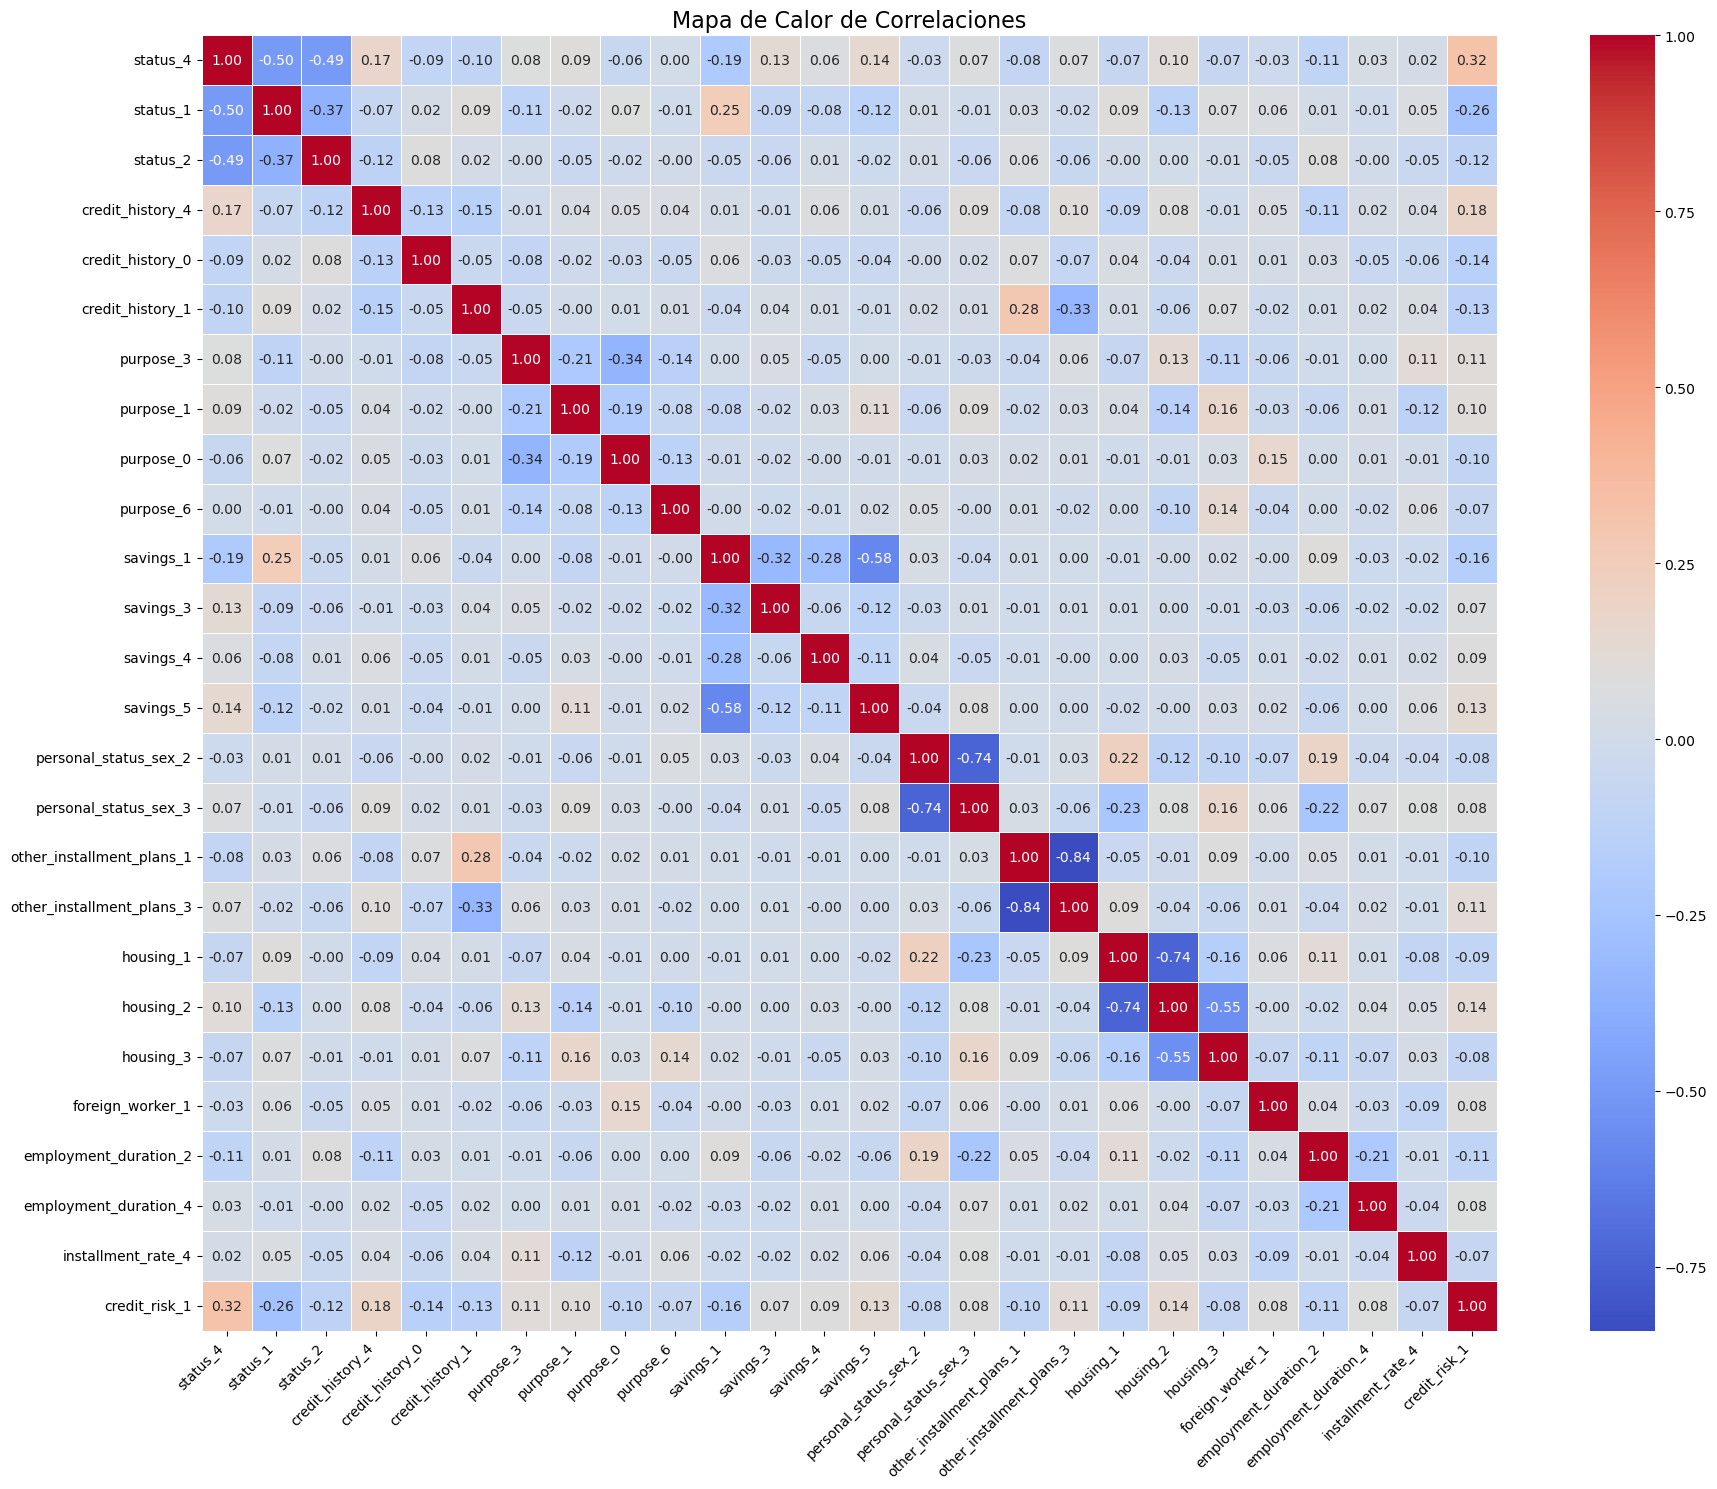

In [388]:
plot_correlation_heatmap(full_dummy_significant_subset, (20, 15))

Variables altamente correlacionadas:

status_4 - status_1

status_4 - status_2

savings_5 - savings_1

personal_status_3 - personal_status_sex_2

other_installment_plans_3 - other_installment_plans_1

housing_2 - housing_1

housing_3 - housing_2

In [389]:
calculate_vif(full_dummy_significant_subset)

feature        VIF
0                    status_4   4.536575
1                    status_1   4.074379
2                    status_2   3.951835
3            credit_history_4   1.121693
4            credit_history_0   1.080277
5            credit_history_1   1.183143
6                   purpose_3   1.404468
7                   purpose_1   1.280314
8                   purpose_0   1.374752
9                   purpose_6   1.152537
10                  savings_1   2.873577
11                  savings_3   1.555064
12                  savings_4   1.431074
13                  savings_5   2.354229
14      personal_status_sex_2   2.256041
15      personal_status_sex_3   2.358116
16  other_installment_plans_1   3.471275
17  other_installment_plans_3   3.627917
18                  housing_1  11.640518
19                  housing_2  11.918075
20                  housing_3   7.544198
21           foreign_worker_1   1.076725
22      employment_duration_2   1.148292
23      employment_duration_4   1.075215
24         installment_rate_4   1.083092
25              credit_risk_1   1.280240

In [390]:
find_correlations(full_dummy_significant_subset, 'credit_risk_1')

status_4                     0.322436
status_1                    -0.258333
status_2                    -0.119581
credit_history_4             0.181713
credit_history_0            -0.144767
credit_history_1            -0.134448
purpose_3                    0.106922
purpose_1                    0.099791
purpose_0                   -0.096900
purpose_6                   -0.070088
savings_1                   -0.161007
savings_3                    0.070954
savings_4                    0.085749
savings_5                    0.129238
personal_status_sex_2       -0.075493
personal_status_sex_3        0.080677
other_installment_plans_1   -0.096510
other_installment_plans_3    0.113285
housing_1                   -0.092785
housing_2                    0.136178
housing_3                   -0.084008
foreign_worker_1             0.082079
employment_duration_2       -0.106397
employment_duration_4        0.075980
installment_rate_4          -0.070784
credit_risk_1                1.000000
Name: credit

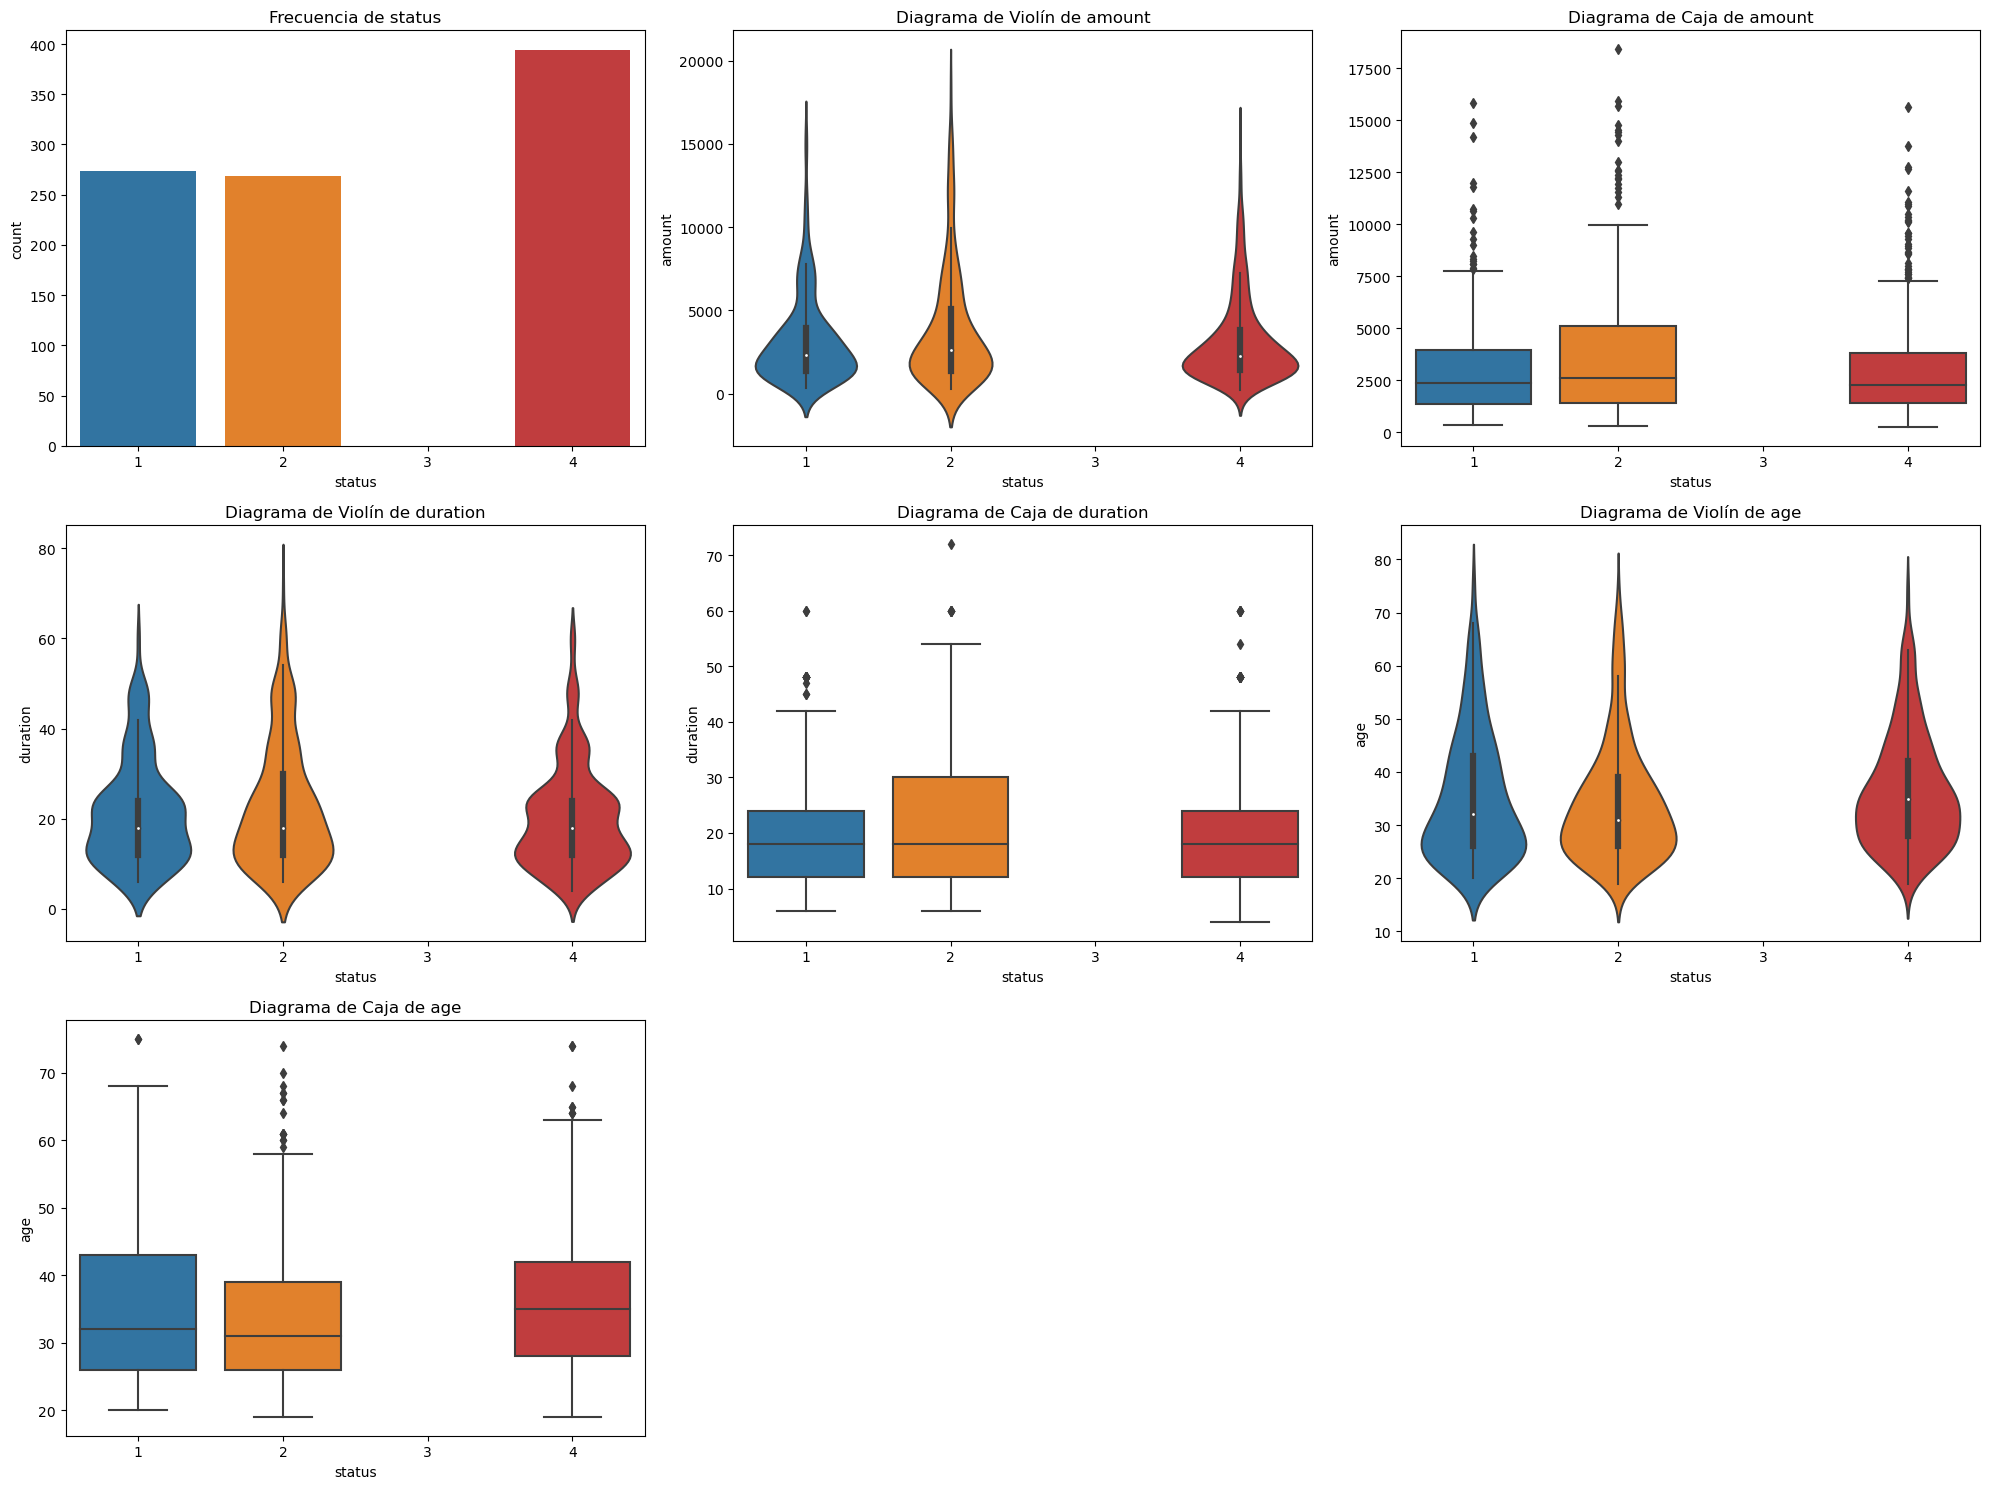

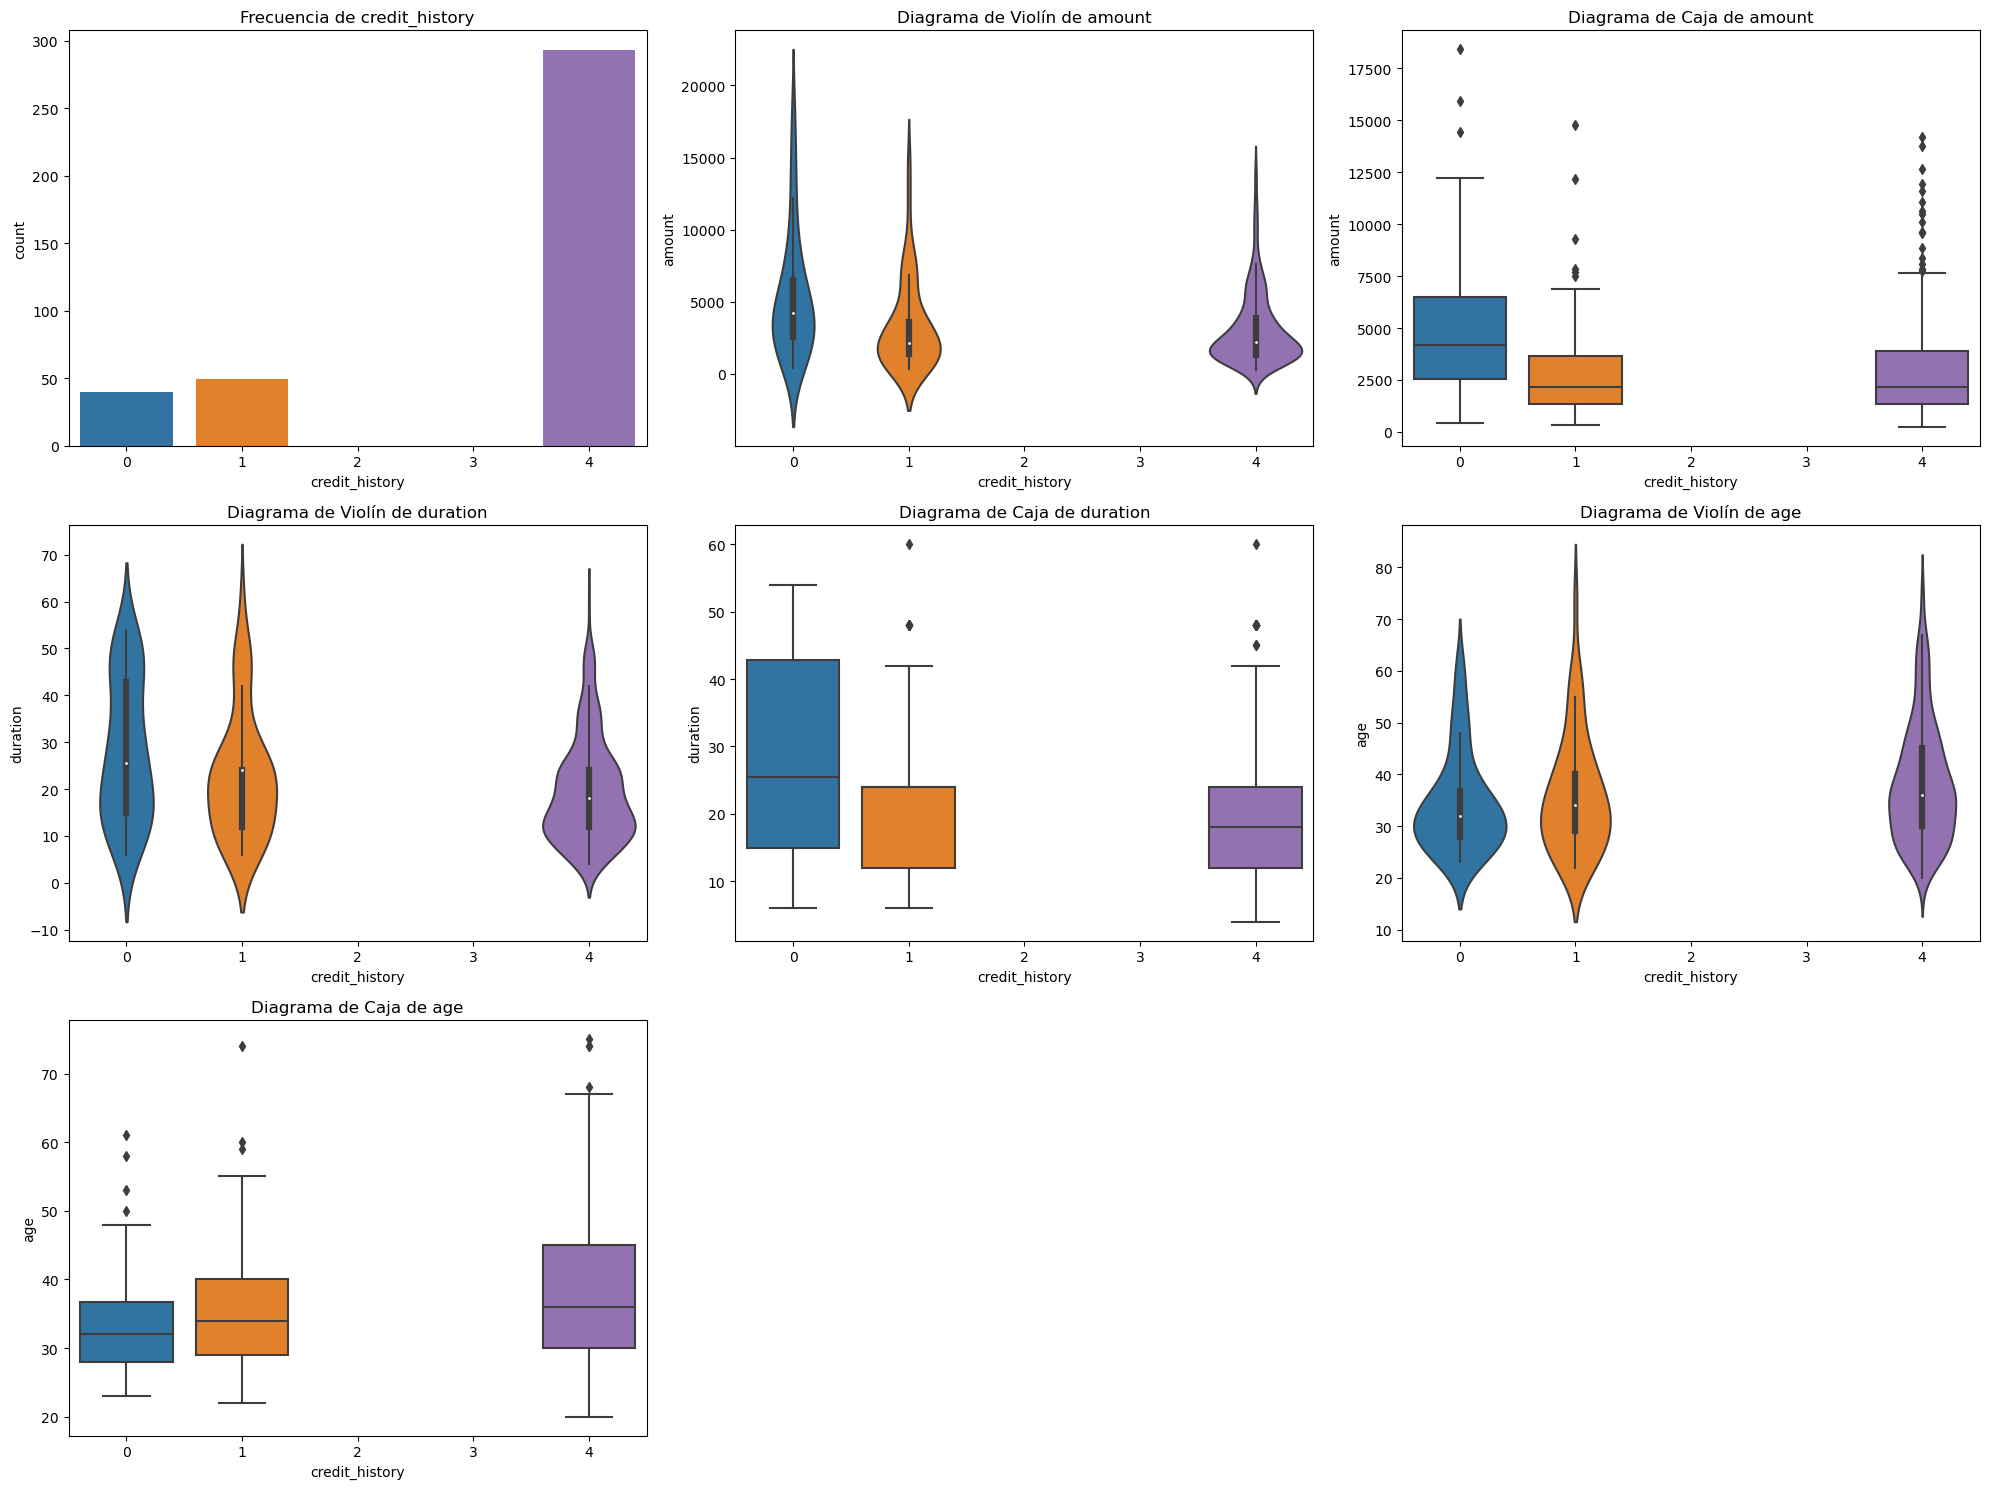

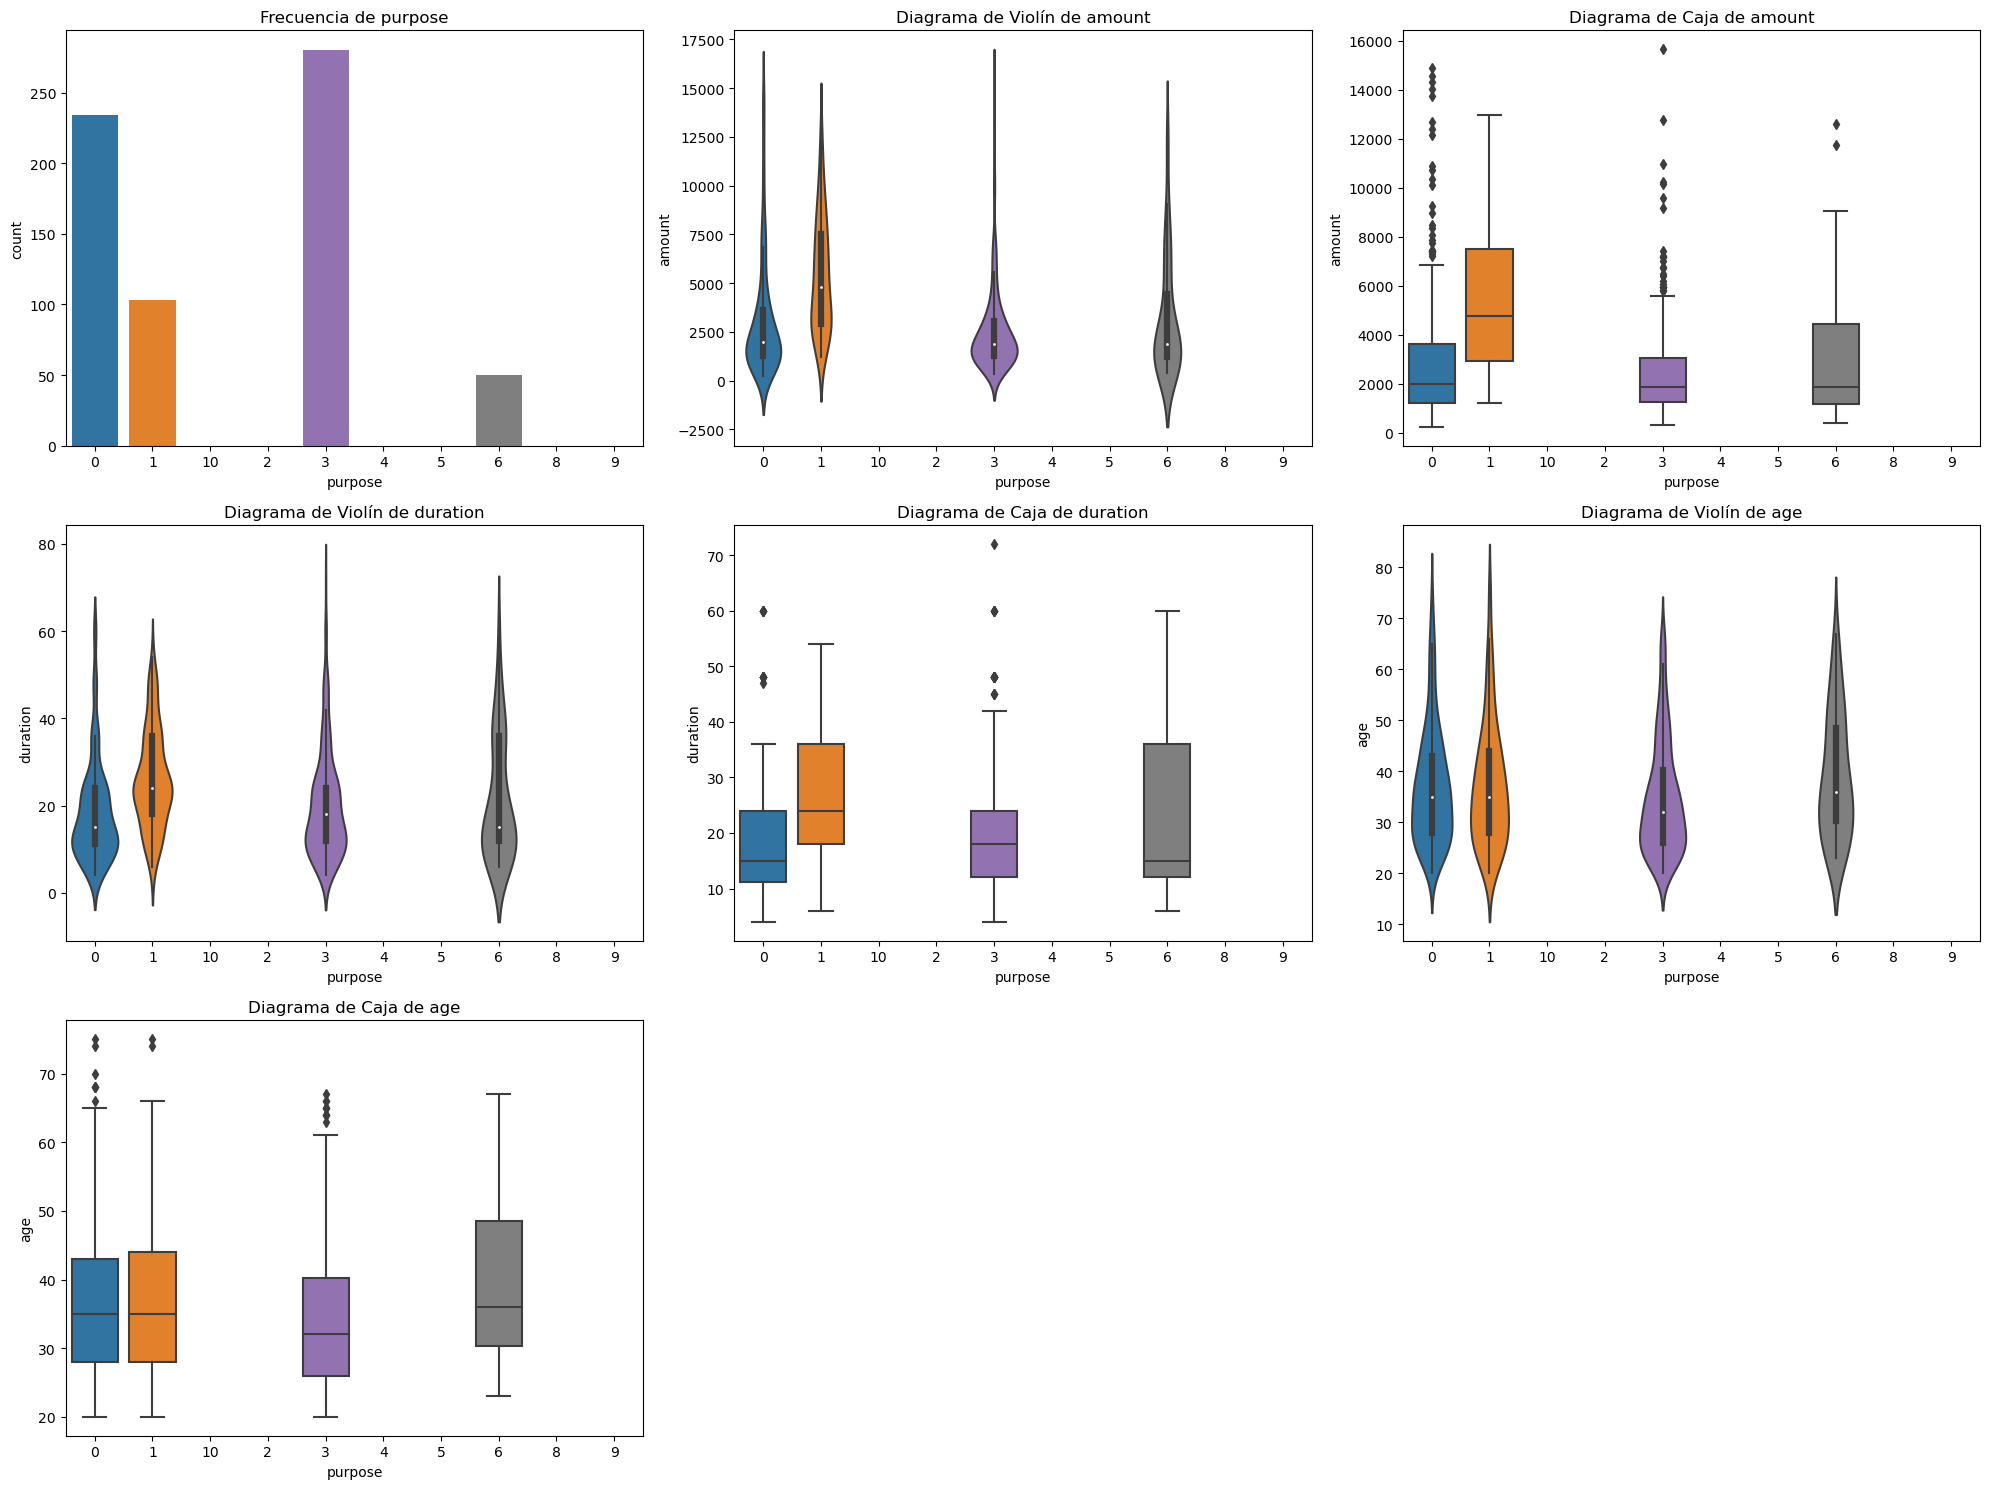

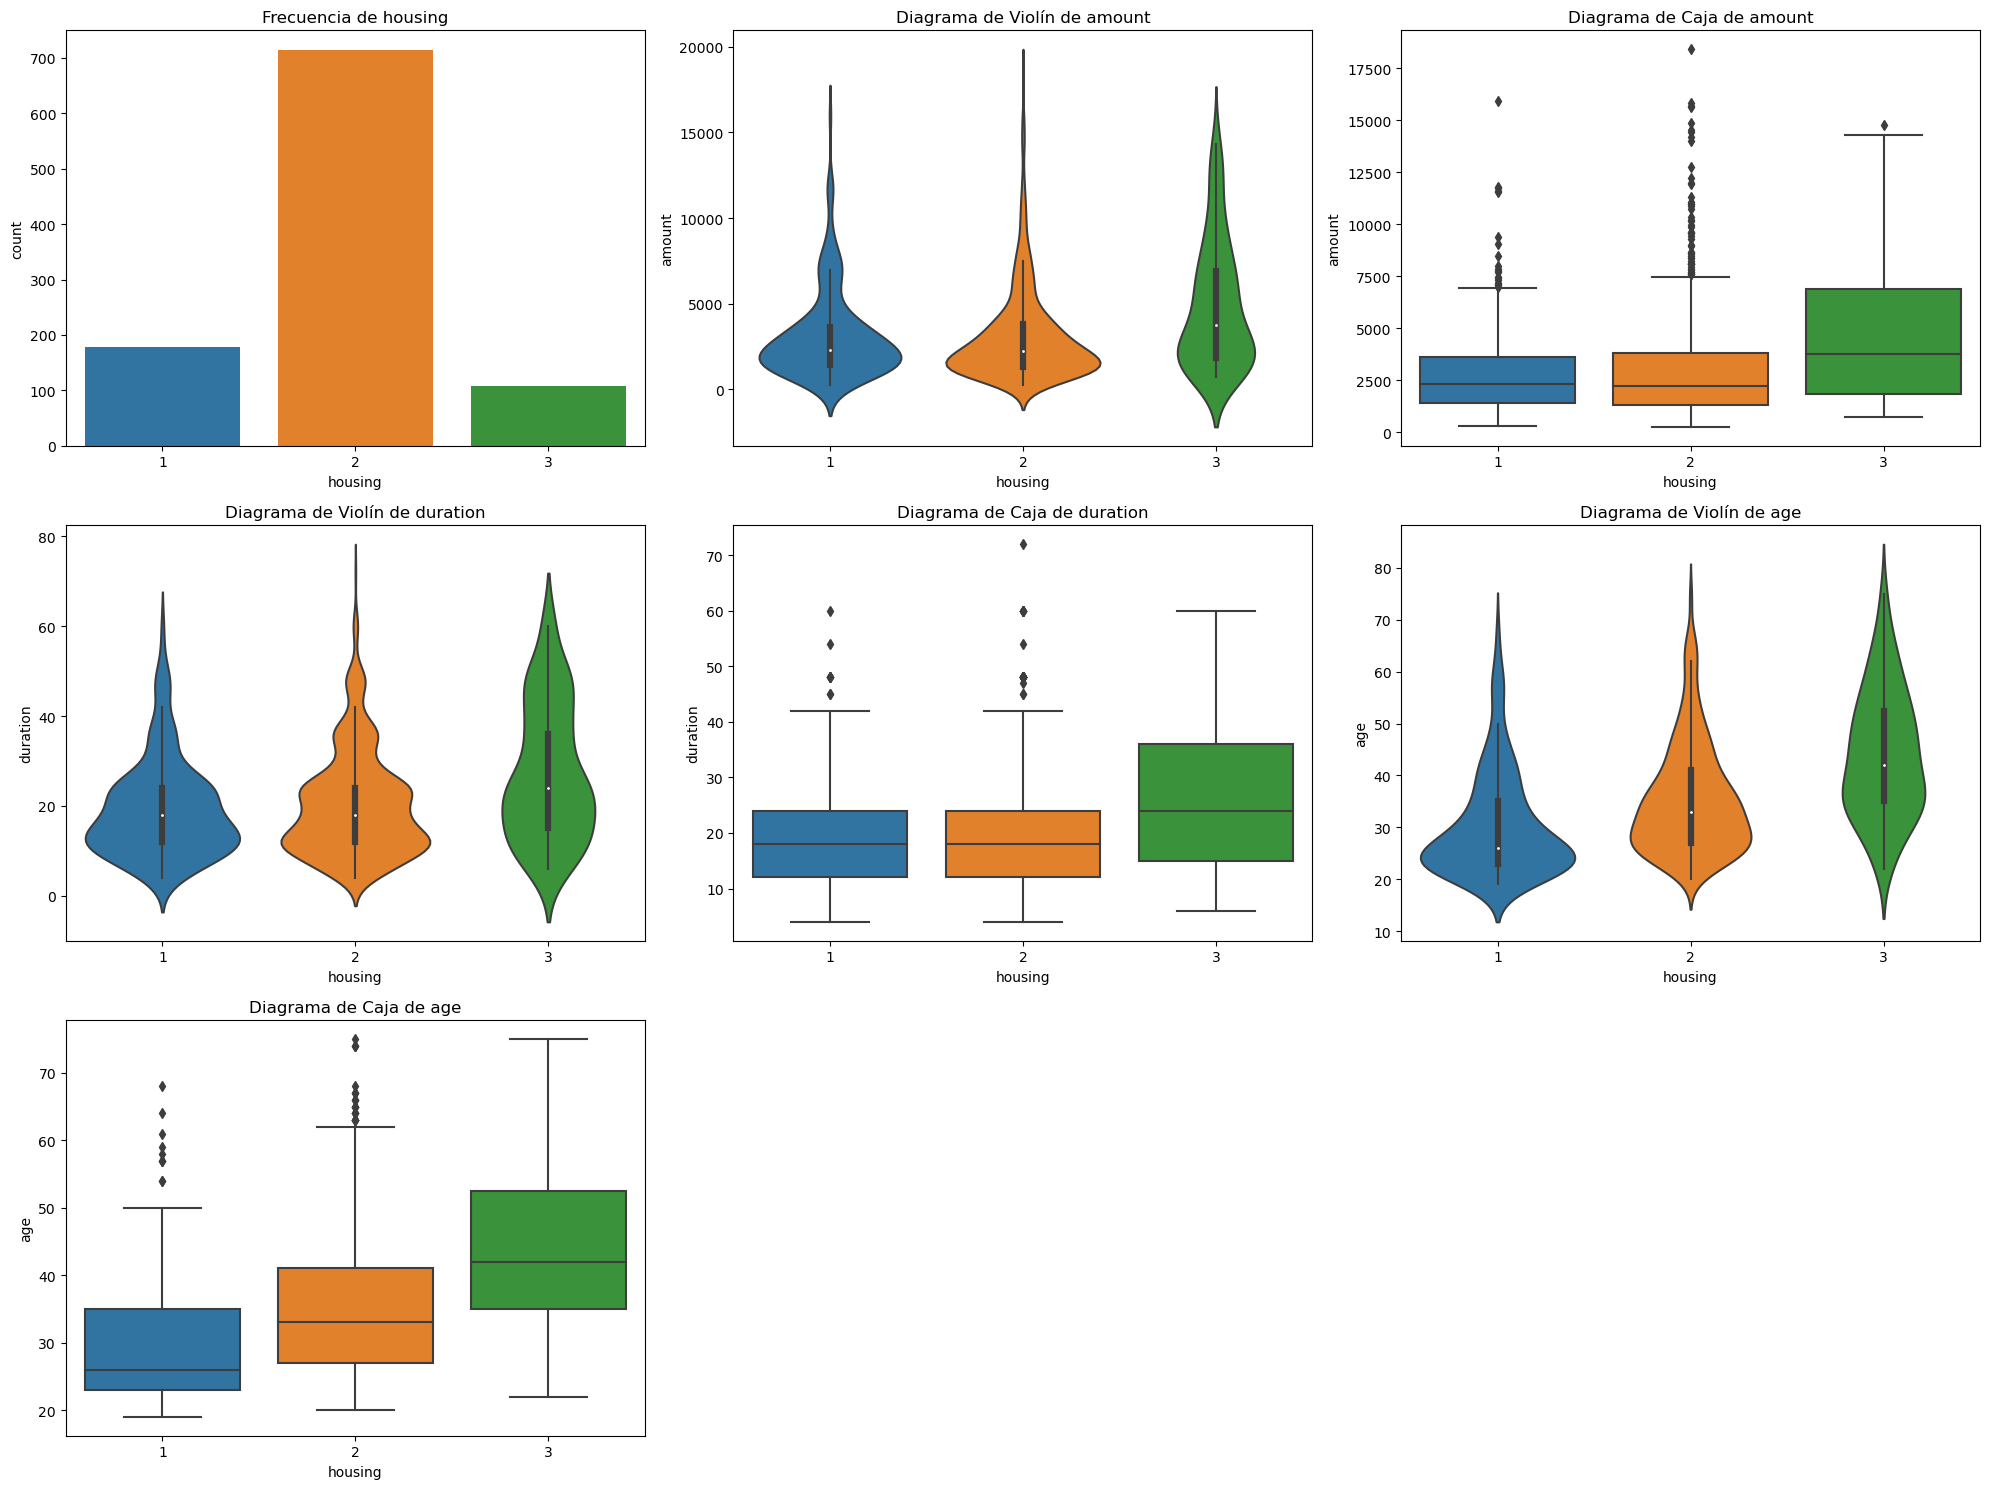

In [391]:
plot_distributions(data, ['amount', 'duration', 'age'], ['status', 'credit_history', 'purpose', 'housing'], [['4', '1', '2'], ['4', '0', '1'], ['3', '1', '0', '6'], ['1', '2', '3']])

In [392]:
print(status_1_dataset.shape)
print(status_3_dataset.shape)
print(status_4_dataset.shape)

(274, 21)
(63, 21)
(394, 21)


In [393]:
# significant_variables = [
#     # "status_1",
#     # "status_2",
#     "status_4",
#     # "credit_history_0",
#     # "credit_history_1",
#     "credit_history_4",
#     # "purpose_0",
#     # "purpose_1",
#     "purpose_3",
#     # "purpose_6",
#     "savings_1",
#     # "savings_3",
#     # "savings_4",
#     # "savings_5",
#     # "personal_status_sex_2",
#     "personal_status_sex_3",
#     # "other_installment_plans_1",
#     "other_installment_plans_3",
#     # "housing_1",
#     "housing_2",
#     # "housing_3",
#     "foreign_worker_1",
#     "employment_duration_2",
#     # "employment_duration_4",
#     "installment_rate_4"
# ]

significant_variables = [
    # "status_1",
    # "status_2",
    "status_4",
    "credit_history_0",
    "credit_history_1",
    "credit_history_4",
    "purpose_0",
    "purpose_1",
    "purpose_3",
    "purpose_6",
    "savings_1",
    "savings_3",
    "savings_4",
    # "savings_5",
    "personal_status_sex_2",
    # "personal_status_sex_3",
    # "other_installment_plans_1",
    "other_installment_plans_3",
    # "housing_1",
    "housing_2",
    # "housing_3",
    "foreign_worker_1",
    "employment_duration_2",
    "employment_duration_4",
    "installment_rate_4"
]

binomial_result = binary_logistic_regression(full_dummy_significant_subset[significant_variables], full_dummy_significant_subset['credit_risk_1'])

Optimization terminated successfully.
         Current function value: 21.740733
         Iterations 6


In [394]:
binomial_result['result'].summary()

/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          credit_risk_1   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                           18
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                     inf
Time:                        00:18:40   Log-Likelihood:                -21741.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2461      0.313      0.785      0.432      -0.368       0.860
status_4                      1.4246      0.189      7.551      0.000       1.055       1.794
credit_history_0             -1.0623      0.375     -2.836      0.005      -1.796      -0.328
credit_history_1             -0.7004      0.355     -1.973      0.048      -1.396      -0.005
credit_history_4              0.6706      0.197      3.405      0.001       0.285       1.057
purpose_0                    -0.5118      0.204     -2.507      0.012      -0.912      -0.112
purpose_1                     0.6463      0.324      1.995      0.046       0.011       1.281
purpose_3                     0.3600      0.208      1.729      0.084      -0.048       0.768
purpose_6                    -0.6159      0.357     -1.726      0.084      -1.315       0.083
savings_1                    -0.5489      0.187     -2.942      0.003      -0.915      -0.183
savings_3                     0.0091      0.398      0.023      0.982      -0.771       0.789
savings_4                     0.7925      0.509      1.558      0.119      -0.204       1.789
personal_status_sex_2        -0.1999      0.171     -1.169      0.242      -0.535       0.135
other_installment_plans_3     0.3742      0.204      1.836      0.066      -0.025       0.774
housing_2                     0.4981      0.174      2.869      0.004       0.158       0.838
foreign_worker_1              1.5561      0.563      2.764      0.006       0.453       2.660
employment_duration_2        -0.2271      0.204     -1.111      0.267      -0.628       0.174
employment_duration_4         0.3785      0.227      1.665      0.096      -0.067       0.824
installment_rate_4           -0.4293      0.160     -2.685      0.007      -0.743      -0.116
=============================================================================================
"""

In [395]:
significant_variables = significant_variables + ['credit_risk_1']

In [396]:
significant_variables

['status_4',
 'credit_history_0',
 'credit_history_1',
 'credit_history_4',
 'purpose_0',
 'purpose_1',
 'purpose_3',
 'purpose_6',
 'savings_1',
 'savings_3',
 'savings_4',
 'personal_status_sex_2',
 'other_installment_plans_3',
 'housing_2',
 'foreign_worker_1',
 'employment_duration_2',
 'employment_duration_4',
 'installment_rate_4',
 'credit_risk_1']

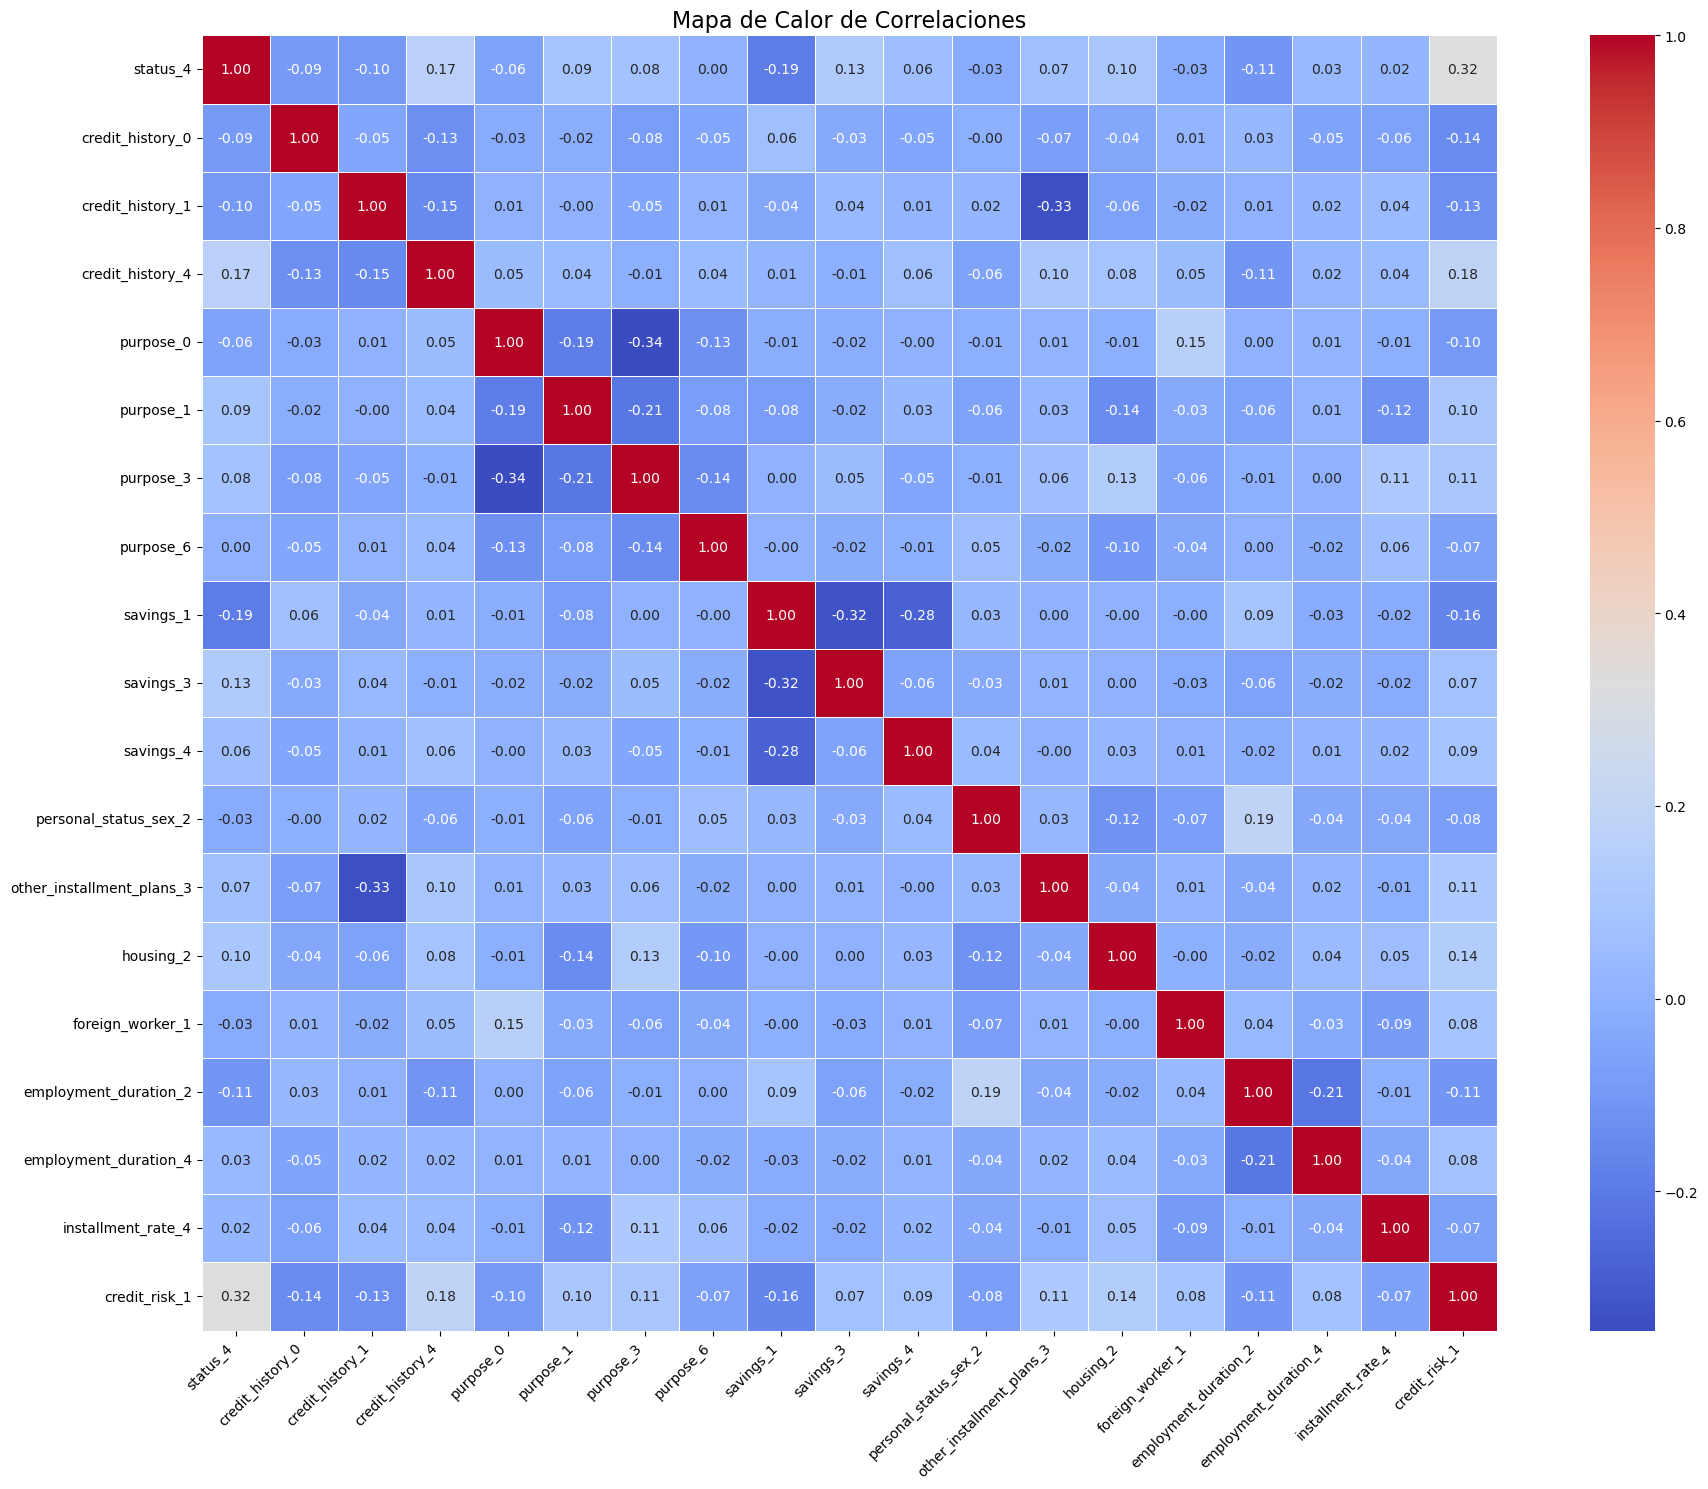

In [397]:
plot_correlation_heatmap(full_dummy_significant_subset[significant_variables], (20, 15))


In [398]:
calculate_vif(full_dummy_significant_subset[significant_variables])


feature       VIF
0                    status_4  0.685286
1            credit_history_0  1.066252
2            credit_history_1  1.126051
3            credit_history_4  0.199323
4                   purpose_0  1.625093
5                   purpose_1  1.300085
6                   purpose_3  0.159149
7                   purpose_6  1.140313
8                   savings_1  0.406870
9                   savings_3  1.197194
10                  savings_4  1.162962
11      personal_status_sex_2  0.262296
12  other_installment_plans_3  0.260681
13                  housing_2  0.934849
14           foreign_worker_1  1.098585
15      employment_duration_2  1.317443
16      employment_duration_4  1.263870
17         installment_rate_4  0.878622
18              credit_risk_1  1.007961

In [399]:
result = sk_binary_logistic_regression(full_dummy_significant_subset[significant_variables], full_dummy_significant_subset['credit_risk_1'], regularization='l2', C=1.0)
print(result['classification_report'])
print("AUC-ROC:", result['AUC-ROC'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

AUC-ROC: 1.0


In [400]:
full_dummy_significant_subset[['status_4', 'credit_history_4', 'credit_risk_1']].value_counts()

status_4  credit_history_4  credit_risk_1
0         0                 1                252
                            0                214
1         0                 1                205
          1                 1                143
0         1                 1                100
                            0                 40
1         0                 0                 36
          1                 0                 10
dtype: int64

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisiones
tree_model = DecisionTreeClassifier(random_state=42)

In [402]:
full_dummy_significant_subset.columns

Index(['status_4', 'status_1', 'status_2', 'credit_history_4',
       'credit_history_0', 'credit_history_1', 'purpose_3', 'purpose_1',
       'purpose_0', 'purpose_6', 'savings_1', 'savings_3', 'savings_4',
       'savings_5', 'personal_status_sex_2', 'personal_status_sex_3',
       'other_installment_plans_1', 'other_installment_plans_3', 'housing_1',
       'housing_2', 'housing_3', 'foreign_worker_1', 'employment_duration_2',
       'employment_duration_4', 'installment_rate_4', 'credit_risk_1'],
      dtype='object')

In [403]:
cart_data_set = full_dummy_significant_subset[['status_4', 'status_2', 'credit_history_4',
       'credit_history_0', 'credit_history_1', 'purpose_3', 'purpose_1',
       'purpose_0', 'purpose_6', 'savings_1', 'savings_3', 'savings_4',
       'savings_5', 'personal_status_sex_2', 'personal_status_sex_3',
       'other_installment_plans_1', 'other_installment_plans_3', 'housing_1',
       'housing_2', 'housing_3', 'foreign_worker_1', 'employment_duration_2',
       'employment_duration_4', 'installment_rate_4', 'credit_risk_1']]
X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [404]:
predictions = tree_model.predict(X_test)

In [405]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

Matriz de Confusión:
 [[ 49  43]
 [ 64 144]]
Precisión del modelo: 0.64
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.43      0.53      0.48        92
           1       0.77      0.69      0.73       208

    accuracy                           0.64       300
   macro avg       0.60      0.61      0.60       300
weighted avg       0.67      0.64      0.65       300



In [406]:
tree_model = DecisionTreeClassifier(random_state=42)

cart_data_set = full_dummy_significant_subset[['status_4', 'status_2', 'credit_history_4',
       'credit_history_0', 'credit_history_1', 'purpose_3', 'purpose_1',
       'purpose_0', 'purpose_6', 
       'savings_1', 'savings_3', 'savings_4', 'savings_5', ## Savings introduce 2% de precisión
       'other_installment_plans_1', 'other_installment_plans_3', ## Other installment plans introducen 3%
       'housing_1', 'housing_2', 'housing_3', # Housing introduce 5% de precisión
       'employment_duration_4', 'installment_rate_4', 'credit_risk_1']]
X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

Matriz de Confusión:
 [[ 52  40]
 [ 63 145]]
Precisión del modelo: 0.66
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.45      0.57      0.50        92
           1       0.78      0.70      0.74       208

    accuracy                           0.66       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.68      0.66      0.67       300



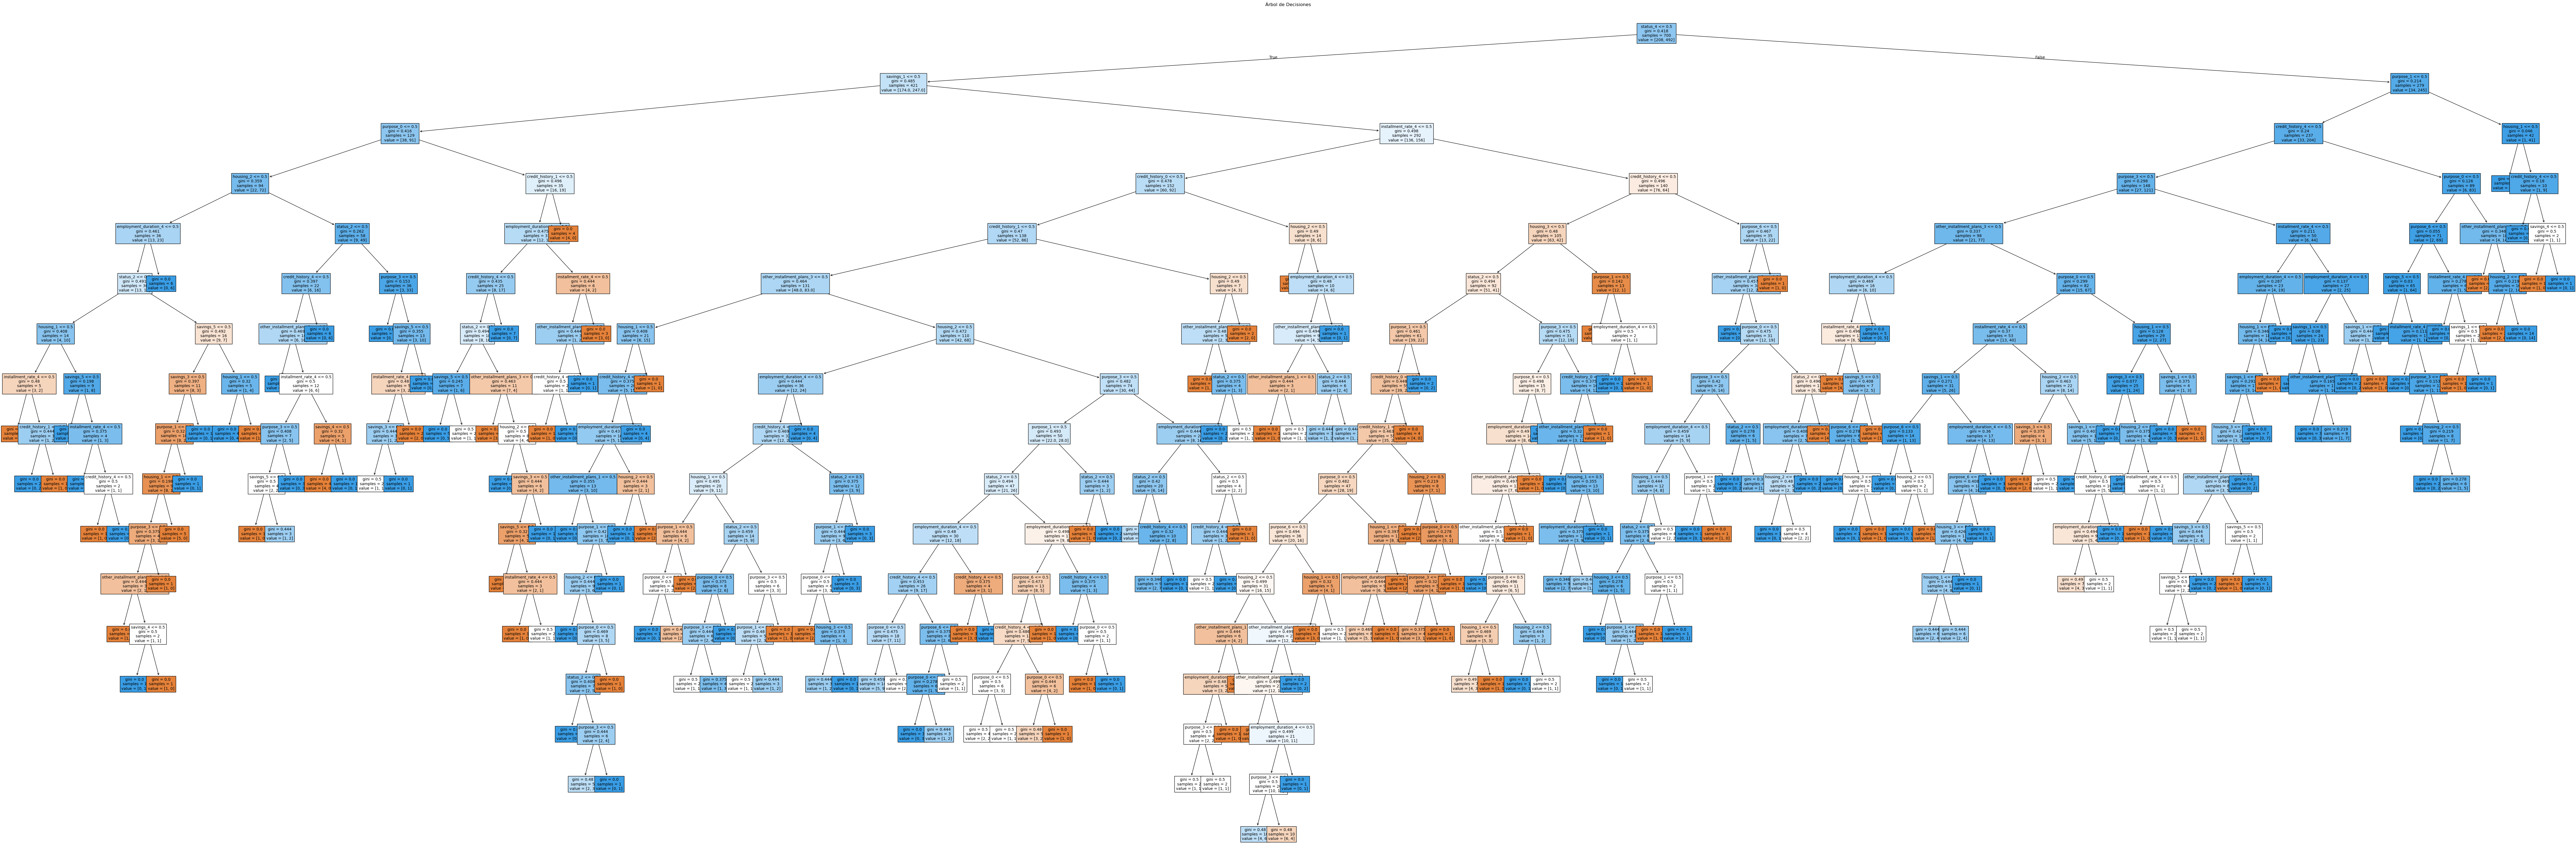

In [407]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisiones
plt.figure(figsize=(120, 40))
plot_tree(tree_model, filled=True, feature_names=X.columns, fontsize=10)
plt.title('Árbol de Decisiones')
plt.show()

In [408]:
import statsmodels.api as sm

# Añadir una constante para el término independiente
X_train_const = sm.add_constant(X_train)

# Ajustar el modelo de regresión logística
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# Resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 22.361725
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          credit_risk_1   No. Observations:                  700
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           19
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                     inf
Time:                        00:18:59   Log-Likelihood:                -15653.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2137        nan        nan        nan        

/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [409]:
# full_dummy_data

# # Añadir una constante para el término independiente
# X_train_const = sm.add_constant(X_train)

# X_train, X_test, y_train, y_test = train_test_split(full_dummy_data.drop(''), y, test_size=0.3, random_state=42)

# # Ajustar el modelo de regresión logística
# model = sm.Logit(y_train, X_train_const)
# result = model.fit()

# # Resumen del modelo
# print(result.summary())



In [410]:
tree_model = DecisionTreeClassifier(random_state=42)

cart_data_set = full_dummy_significant_subset[['status_4', 'credit_history_4', 'purpose_1','savings_4', 'savings_5', 'credit_risk_1']]

X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

Matriz de Confusión:
 [[ 55  37]
 [ 54 154]]
Precisión del modelo: 0.70
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        92
           1       0.81      0.74      0.77       208

    accuracy                           0.70       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.71      0.70      0.70       300



In [411]:
balanced_cart_data_set = smote_oversampling(cart_data_set.drop('credit_risk_1', axis=1), cart_data_set['credit_risk_1'])

tree_model = DecisionTreeClassifier(random_state=42)

X = balanced_cart_data_set.drop('credit_risk_1', axis=1)
y = balanced_cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)


Matriz de Confusión:
 [[178  30]
 [ 84 128]]
Precisión del modelo: 0.73
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       208
           1       0.81      0.60      0.69       212

    accuracy                           0.73       420
   macro avg       0.74      0.73      0.72       420
weighted avg       0.75      0.73      0.72       420



In [412]:
tree_model = DecisionTreeClassifier(random_state=42)

cart_data_set = full_dummy_significant_subset[['credit_history_0', 'credit_risk_1']]
X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

Matriz de Confusión:
 [[  8  84]
 [  5 203]]
Precisión del modelo: 0.70
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.62      0.09      0.15        92
           1       0.71      0.98      0.82       208

    accuracy                           0.70       300
   macro avg       0.66      0.53      0.49       300
weighted avg       0.68      0.70      0.62       300



In [413]:
full_dummy_significant_subset.credit_history_0.value_counts()

0    960
1     40
Name: credit_history_0, dtype: int64

In [414]:
full_dummy_significant_subset[(full_dummy_significant_subset['credit_history_0'] == 1)]

status_4  status_1  ...  installment_rate_4  credit_risk_1
92          0         0  ...                   0              1
182         0         1  ...                   0              1
231         1         0  ...                   1              1
309         1         0  ...                   0              1
319         1         0  ...                   1              1
365         1         0  ...                   0              1
367         0         0  ...                   0              1
376         0         1  ...                   1              0
492         0         1  ...                   0              1
539         0         0  ...                   0              1
556         0         0  ...                   0              1
575         0         0  ...                   0              1
594         0         1  ...                   0              1
641         0         0  ...                   0              1
715         1         0  ...                   1              1
739         0         0  ...                   0              1
755         0         1  ...                   1              0
757         0         1  ...                   1              0
762         1         0  ...                   0              0
788         0         0  ...                   0              0
790         0         0  ...                   0              0
795         0         0  ...                   1              0
806         0         0  ...                   0              0
826         0         0  ...                   1              0
830         0         0  ...                   1              0
836         1         0  ...                   0              0
881         0         0  ...                   1              0
904         0         1  ...                   0              0
909         0         1  ...                   0              0
914         0         1  ...                   0              0
917         0         0  ...                   1              0
918         0         1  ...                   0              0
923         0         1  ...                   0              0
929         0         0  ...                   0              0
958         0         0  ...                   1              0
962         0         0  ...                   0              0
971         0         0  ...                   0              0
973         0         1  ...                   0              0
976         0         0  ...                   0              0
994         0         1  ...                   1              0

[40 rows x 26 columns]

In [415]:
full_dummy_data = combine_dataframes([
    dummy_status_data[['status_1', 'status_2', 'status_3', 'status_4']],
    dummy_credit_history_data[['credit_history_0', 'credit_history_1', 'credit_history_2', 'credit_history_3', 'credit_history_4']],
    dummy_purpose_data[['purpose_0', 'purpose_1', 'purpose_10', 'purpose_2', 'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6', 'purpose_8', 'purpose_9']],
    dummy_savings_data[['savings_1', 'savings_2', 'savings_3', 'savings_4', 'savings_5']],
    dummy_personal_status_sex_data[['personal_status_sex_1', 'personal_status_sex_2', 'personal_status_sex_3', 'personal_status_sex_4']],
    dummy_other_installment_plans_data[['other_installment_plans_1', 'other_installment_plans_2', 'other_installment_plans_3']],
    dummy_housing_data[['housing_1', 'housing_2', 'housing_3']],
    dummy_foreign_worker_data[['foreign_worker_1', 'foreign_worker_2']],
    dummy_employment_duration_data[['employment_duration_1', 'employment_duration_2', 'employment_duration_3', 'employment_duration_4', 'employment_duration_5']],
    dummy_installment_rate_data
], axis=1, ignore_index=False)

In [416]:
full_dummy_data.shape

(1000, 46)

In [417]:
##balanced_cart_data_set = smote_oversampling(cart_data_set.drop('credit_risk_1', axis=1), cart_data_set['credit_risk_1'])
import pandas as pd


full_dummy_data = smote_oversampling(full_dummy_data.drop('credit_risk_1', axis=1), (full_dummy_data['credit_risk_1']).astype(int) )



In [418]:
chi_squared_test(full_dummy_data, 'credit_risk_1')

{'status_1': {'chi2_statistic': 111.02328873343205,
  'p_value': 5.162259947203904e-15},
 'status_2': {'chi2_statistic': 42.58066144381934,
  'p_value': 0.028823819468388794},
 'status_3': {'chi2_statistic': 27.81772337596846,
  'p_value': 0.0034520195055299558},
 'status_4': {'chi2_statistic': 273.98557765866457,
  'p_value': 3.0809709367606787e-40},
 'credit_history_0': {'chi2_statistic': 24.43048685238219,
  'p_value': 0.1801542142762752},
 'credit_history_1': {'chi2_statistic': 36.83422459893048,
  'p_value': 0.1505121248584516},
 'credit_history_2': {'chi2_statistic': 16.49867189674913,
  'p_value': 0.3497053812825135},
 'credit_history_3': {'chi2_statistic': 24.48979591836735,
  'p_value': 0.3220889996995457},
 'credit_history_4': {'chi2_statistic': 131.57002519638357,
  'p_value': 8.202137135274578e-13},
 'purpose_0': {'chi2_statistic': 35.422340898976415,
  'p_value': 0.12848688536492747},
 'purpose_1': {'chi2_statistic': 49.19428611246603,
  'p_value': 9.983098071545379e-05},


In [419]:
balanced_significant_vars = full_dummy_data[
    ['status_1',
    'status_4',
    'credit_history_4',
    'purpose_1',
    'purpose_3',
    'savings_1',
    'savings_3',
    'savings_4',
    'savings_5',
    'personal_status_sex_3',
    'other_installment_plans_3',
    'housing_2',
    'foreign_worker_1',
    'employment_duration_4',
    'installment_rate_1',
    'installment_rate_2',
    'credit_risk_1']
]

X = balanced_significant_vars.drop('credit_risk_1', axis=1)
y = balanced_significant_vars['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [420]:
# Añadir una constante para el término independiente
X_train_const = sm.add_constant(X_train)

# Ajustar el modelo de regresión logística
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# Resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.541642
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:          credit_risk_1   No. Observations:                  980
Model:                          Logit   Df Residuals:                      963
Method:                           MLE   Df Model:                           16
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.2186
Time:                        00:19:01   Log-Likelihood:                -530.81
converged:                       True   LL-Null:                       -679.28
Covariance Type:            nonrobust   LLR p-value:                 1.100e-53
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.3301      0.150      8.893      0.000       1

In [424]:
variables_significativas = [
    "status_4",
    "credit_history_0",
    "credit_history_1",
    "credit_history_4",
    "purpose_0",
    "savings_1",
    "housing_2",
    "foreign_worker_1",
    'credit_risk_1'
]

In [425]:
tree_model = DecisionTreeClassifier(random_state=42)

cart_data_set = full_dummy_significant_subset[variables_significativas]

X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

Matriz de Confusión:
 [[ 40  52]
 [ 36 172]]
Precisión del modelo: 0.71
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.53      0.43      0.48        92
           1       0.77      0.83      0.80       208

    accuracy                           0.71       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.69      0.71      0.70       300

